<a href="https://colab.research.google.com/github/InwARMSelviAXE/bsc_dpdm22/blob/main/%5Bdataprep1%5Dproperty_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [302]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [303]:
import pandas as pd

In [304]:
link = 'https://docs.google.com/spreadsheets/d/1xOUyJLF4NZTDkYCDTIj5bCuumi6d5ZnQT7-e7LpEe4o/export?format=xlsx'
house = pd.read_excel(link,sheet_name='บ้าน')
land = pd.read_excel(link,sheet_name='ที่ดิน')
condo = pd.read_excel(link,sheet_name='คอนโด')
townhome = pd.read_excel(link,sheet_name='ทาวน์โฮม')
commercial = pd.read_excel(link,sheet_name='อาคารพาณิชย์')

In [305]:
house

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1215,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1217,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1218,2,https://nayoo.co/khonkaen/posts/6260,บ้านเดี่ยว,มั่นใจ,620000,700000.0,ราคาเสนอขาย 4-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [306]:
est1 = house[house['ID ผู้ประเมิน']==1]
est1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3500000.0,"5,000-18,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"5,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1211,1,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,550000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1213,1,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,700000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1215,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1217,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [307]:
est1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,610.0,6.100000e+02,6.090000e+02
mean,1.0,3.382782e+06,3.240345e+06
std,0.0,5.000758e+06,4.692873e+06
min,1.0,2.600000e+05,2.200000e+05
25%,1.0,1.492500e+06,1.500000e+06
50%,1.0,2.540000e+06,2.500000e+06
75%,1.0,4.000000e+06,4.000000e+06
max,1.0,1.039350e+08,1.000000e+08


In [308]:
est2 = house[house['ID ผู้ประเมิน']==2]
est2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1210,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,ราคาเสนอขาย 2-3 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1212,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,ราคาเสนอขาย 4-6 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1214,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,ราคาเสนอขาย 1-2 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [309]:
est2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,610.0,6.100000e+02,4.980000e+02
mean,2.0,3.369097e+06,3.449197e+06
std,0.0,4.975575e+06,4.381048e+06
min,2.0,2.600000e+05,2.500000e+05
25%,2.0,1.467500e+06,1.892500e+06
50%,2.0,2.530000e+06,2.600000e+06
75%,2.0,4.067500e+06,4.200000e+06
max,2.0,1.039350e+08,8.000000e+07


In [310]:
est1h = est1[['ID ผู้ประเมิน', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย', 'ความมั่นใจในการเมินราคาทรัพย์', 'ให้คะแนนทรัพย์']]
est1h.count().reset_index()

,index,0
0,ID ผู้ประเมิน,610
1,ราคาทรัพย์,610
2,ประเมินราคาซื้อ-ขาย,609
3,ความมั่นใจในการเมินราคาทรัพย์,610
4,ให้คะแนนทรัพย์,610


In [311]:
est1g = est1[est1['ความมั่นใจในการเมินราคาทรัพย์']=='มั่นใจ']
est1g

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3500000.0,"5,000-18,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"5,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1211,1,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,550000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1213,1,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,700000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1215,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1217,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [312]:
est1b = est1[est1['ความมั่นใจในการเมินราคาทรัพย์']=='ไม่มั่นใจ']
est1b

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์


In [313]:
est2h = est2[['ID ผู้ประเมิน', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย', 'ความมั่นใจในการเมินราคาทรัพย์', 'ให้คะแนนทรัพย์']]
est2h.count().reset_index()

,index,0
0,ID ผู้ประเมิน,610
1,ราคาทรัพย์,610
2,ประเมินราคาซื้อ-ขาย,498
3,ความมั่นใจในการเมินราคาทรัพย์,610
4,ให้คะแนนทรัพย์,499


In [314]:
est2g = est2[est2['ความมั่นใจในการเมินราคาทรัพย์']=='มั่นใจ']
est2g

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1210,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,ราคาเสนอขาย 2-3 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1212,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,ราคาเสนอขาย 4-6 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1214,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,ราคาเสนอขาย 1-2 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [315]:
est2b = est2[est2['ความมั่นใจในการเมินราคาทรัพย์']=='ไม่มั่นใจ']
est2b

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
176,2,https://nayoo.co/khonkaen/posts/18633,บ้านเดี่ยว,ไม่มั่นใจ,5000000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN
205,2,https://nayoo.co/khonkaen/posts/38,บ้านเดี่ยว,ไม่มั่นใจ,650000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN
209,2,https://nayoo.co/khonkaen/posts/491,บ้านเดี่ยว,ไม่มั่นใจ,3740000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN
215,2,https://nayoo.co/khonkaen/posts/508,บ้านเดี่ยว,ไม่มั่นใจ,3061000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN
217,2,https://nayoo.co/khonkaen/posts/509,บ้านเดี่ยว,ไม่มั่นใจ,1283000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN
...,...,...,...,...,...,...,...,...,...
1161,2,https://nayoo.co/khonkaen/posts/6103,บ้านเดี่ยว,ไม่มั่นใจ,1900000,NaN,NaN,ข้อมูลทรัพย์ไม่เพียงพอ,NaN
1167,2,https://nayoo.co/khonkaen/posts/6107,บ้านเดี่ยว,ไม่มั่นใจ,1619000,NaN,NaN,ข้อมูลทรัพย์ไม่เพียงพอ,NaN
1179,2,https://nayoo.co/khonkaen/posts/6117,บ้านเดี่ยว,ไม่มั่นใจ,570000,NaN,NaN,ข้อมูลทรัพย์ไม่เพียงพอ,NaN
1199,2,https://nayoo.co/khonkaen/posts/6261,บ้านเดี่ยว,ไม่มั่นใจ,620000,NaN,NaN,ข้อมูลทรัพย์ผิด,NaN


In [316]:
est2b = est2[est2['ให้คะแนนทรัพย์']=='3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน']
est2b.count()

ID ผู้ประเมิน                     367
post id                           367
property_type                     367
ความมั่นใจในการเมินราคาทรัพย์     367
ราคาทรัพย์                        367
ประเมินราคาซื้อ-ขาย               366
ปัจจัยในการประเมินราคาซื้อ-ขาย    367
เหตุผลไม่มั่นใจราคาประเมิน          1
ให้คะแนนทรัพย์                    367
dtype: int64

In [317]:
est1e = est1['ให้คะแนนทรัพย์'].value_counts()
est1e

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     476
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    126
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
1 ขายไม่ได้แน่นอน                       2
Name: ให้คะแนนทรัพย์, dtype: int64

In [318]:
est2e = est2['ให้คะแนนทรัพย์'].value_counts()
est2e

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     367
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      117
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

# เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนของราคาตั้งขาย

# บ้าน

In [319]:
house

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1215,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1217,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1218,2,https://nayoo.co/khonkaen/posts/6260,บ้านเดี่ยว,มั่นใจ,620000,700000.0,ราคาเสนอขาย 4-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [320]:
est1 = house[house['ID ผู้ประเมิน']==1]
est1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3500000.0,"5,000-18,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"5,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1211,1,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,550000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1213,1,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,700000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1215,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1217,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [321]:
est2 = house[house['ID ผู้ประเมิน']==2]
est2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1210,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,ราคาเสนอขาย 2-3 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1212,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,ราคาเสนอขาย 4-6 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1214,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,ราคาเสนอขาย 1-2 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [322]:
est1_nodup = est1.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
est2_nodup = est2.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

In [323]:
est2['ประเมิน1'] = est2_nodup['post id'].map(est1_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2

<ipython-input-323-ebf9b8b1949a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2['ประเมิน1'] = est2_nodup['post id'].map(est1_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,5000000.0
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2500000.0
...,...,...,...,...,...,...,...,...,...,...
1210,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,ราคาเสนอขาย 2-3 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,550000.0
1212,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,ราคาเสนอขาย 4-6 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,700000.0
1214,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,ราคาเสนอขาย 1-2 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,600000.0


In [324]:
est2['ประเมิน2'] = est2_nodup['post id'].map(est2_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2

<ipython-input-324-9c05a513301d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2['ประเมิน2'] = est2_nodup['post id'].map(est2_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1,ประเมิน2
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0,2700000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0,2400000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,5000000.0,9000000.0
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0,3700000.0
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2500000.0,2500000.0
...,...,...,...,...,...,...,...,...,...,...,...
1210,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,ราคาเสนอขาย 2-3 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,550000.0,300000.0
1212,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,ราคาเสนอขาย 4-6 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,700000.0,500000.0
1214,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,ราคาเสนอขาย 1-2 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0,300000.0
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,600000.0,500000.0


In [325]:
house1 = est2[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
house1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0
...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0


In [326]:
house1.fillna(value={'ประเมิน1':est2['ประเมิน1'].mean()})

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0
...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0


In [327]:
house1.fillna(value={'ประเมิน2':est2['ประเมิน2'].mean()})

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0
...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0


In [328]:
house1.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1       True
ประเมิน2       True
dtype: bool

In [329]:
house1.fillna(0, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [330]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [331]:
a = house1['ราคาทรัพย์']
aby1 = house1['ประเมิน1']
aby2 = house1['ประเมิน2']

In [332]:
mape(a,aby1)
print(f'ค่า MAPE ระหว่าง ราคาที่ตั้งขาย(บ้าน) และ ราคาของผู้ประเมินคนที่1 เท่ากับ {mape(a,aby1)}')

ค่า MAPE ระหว่าง ราคาที่ตั้งขาย(บ้าน) และ ราคาของผู้ประเมินคนที่1 เท่ากับ 0.3074872622604611


In [333]:
mape(a,aby2)
print(f'ค่า MAPE ระหว่าง ราคาที่ตั้งขาย(บ้าน) และ ราคาของผู้ประเมินคนที่1 เท่ากับ {mape(a,aby2)}')

ค่า MAPE ระหว่าง ราคาที่ตั้งขาย(บ้าน) และ ราคาของผู้ประเมินคนที่1 เท่ากับ 0.41180714785238864


In [334]:
mape(aby1,aby2)
print(f'ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่1 และ ราคาของผู้ประเมินคนที่2 เท่ากับ {mape(aby1,aby2)}')

ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่1 และ ราคาของผู้ประเมินคนที่2 เท่ากับ 7.330531262321582e+20


# ที่ดิน

In [335]:
land

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2200000.0,10000-22000,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,"25,000-80,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...,...,...,...
205,1,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2000000.0,"500-15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
207,1,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"500-25,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
208,2,https://nayoo.co/khonkaen/posts/17145,ที่ดิน,มั่นใจ,3000000,2800000.0,"ราคาเสนอขาย 10,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [336]:
land.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย                True
ปัจจัยในการประเมินราคาซื้อ-ขาย     True
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                     True
dtype: bool

In [337]:
est1_land = land[land['ID ผู้ประเมิน']==1]
est1_land

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,"25,000-80,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,18000000.0,"8,000-35,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
9,1,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,35000000.0,"15,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
12,1,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2200000.0,"10,000-20,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
201,1,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,5000000,4000000.0,"800-25,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
203,1,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,500000.0,"3,000-25,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
205,1,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2000000.0,"500-15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
207,1,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"500-25,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [338]:
est2_land = land[land['ID ผู้ประเมิน']==2]
est2_land

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,"ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,"ราคาเสนอขาย 2,000 - 4,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
200,2,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,5000000,4000000.0,"ราคาเสนอขาย 8,000 - 10,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
202,2,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,750000.0,"ราคาเสนอขาย 7,000-8,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
204,2,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [339]:
est1land_nodup = est1_land.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
est2land_nodup = est2_land.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

In [340]:
est2_land['ประเมิน1']  = est2land_nodup['post id'].map(est1land_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est2_land

<ipython-input-340-c202b53885d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_land['ประเมิน1']  = est2land_nodup['post id'].map(est1land_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,18000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,"ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,35000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,"ราคาเสนอขาย 2,000 - 4,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0
...,...,...,...,...,...,...,...,...,...,...
200,2,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,5000000,4000000.0,"ราคาเสนอขาย 8,000 - 10,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,4000000.0
202,2,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,750000.0,"ราคาเสนอขาย 7,000-8,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0
204,2,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2000000.0
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1500000.0


In [341]:
est2_land['ประเมิน2']  = est2land_nodup['post id'].map(est2land_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est2_land

<ipython-input-341-587e30acfc18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_land['ประเมิน2']  = est2land_nodup['post id'].map(est2land_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1,ประเมิน2
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0,2000000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8000000.0,12000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,18000000.0,70000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,"ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,35000000.0,60000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,"ราคาเสนอขาย 2,000 - 4,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0,2500000.0
...,...,...,...,...,...,...,...,...,...,...,...
200,2,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,5000000,4000000.0,"ราคาเสนอขาย 8,000 - 10,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,4000000.0,4000000.0
202,2,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,750000.0,"ราคาเสนอขาย 7,000-8,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0,750000.0
204,2,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2000000.0,2500000.0
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1500000.0,1500000.0


In [342]:
land1 = est2_land[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
land1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [343]:
land1 = land1.fillna(value={'ประเมิน1':est2_land['ประเมิน1'].mean()})
land1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [344]:
land1 = land1.fillna(value={'ประเมิน2':est2_land['ประเมิน2'].mean()})
land1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [345]:
land1.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

In [346]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [347]:
r = land1['ราคาทรัพย์']
rby1 = land1['ประเมิน1']
rby2 = land1['ประเมิน2']

In [348]:
mape(r,rby1)
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์(อาคารพาณิชย์) และ ราคาของผู้ประเมินคนที่1 เท่ากับ {mape(r,rby1)}')

ค่า MAPE ระหว่าง ราคาทรัพย์(อาคารพาณิชย์) และ ราคาของผู้ประเมินคนที่1 เท่ากับ 0.5083212151725603


In [349]:
mape(r,rby2)
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์(อาคารพาณิชย์) และ ราคาของผู้ประเมินคนที่1 เท่ากับ {mape(r,rby2)}')

ค่า MAPE ระหว่าง ราคาทรัพย์(อาคารพาณิชย์) และ ราคาของผู้ประเมินคนที่1 เท่ากับ 0.537436567717275


In [350]:
mape(rby1,rby2)
print(f'ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่1 และ ราคาของผู้ประเมินคนที่2 เท่ากับ {mape(rby1,rby2)}')

ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่1 และ ราคาของผู้ประเมินคนที่2 เท่ากับ 0.7409700513455831


# คอนโด

In [351]:
condo

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,1395.0,คอนโด,มั่นใจ,1600000,2300000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,1443.0,คอนโด,มั่นใจ,1860000,1800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,1,1609.0,คอนโด,มั่นใจ,1490000,1500000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,1640.0,คอนโด,มั่นใจ,1280000,1600000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,1,1641.0,คอนโด,มั่นใจ,4290000,2700000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน
8,1,1650.0,คอนโด,มั่นใจ,1700000,1550000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
9,1,1840.0,คอนโด,มั่นใจ,3790000,2800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [352]:
condo.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
Unnamed: 9                        False
Unnamed: 10                       False
dtype: bool

In [353]:
condo.fillna(0, inplace=True)

In [354]:
condo.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน        False
ให้คะแนนทรัพย์                    False
Unnamed: 9                        False
Unnamed: 10                       False
dtype: bool

In [355]:
condo['ประเมิน1'] = condo['ประเมินราคาซื้อ-ขาย']

In [356]:
cmape = condo[['post id','ราคาทรัพย์','ประเมิน1']]
cmape

,post id,ราคาทรัพย์,ประเมิน1
0,32.0,3500000,3500000.0
1,36.0,1930000,2200000.0
2,603.0,2438000,2800000.0
3,1395.0,1600000,2300000.0
4,1443.0,1860000,1800000.0
5,1609.0,1490000,1500000.0
6,1640.0,1280000,1600000.0
7,1641.0,4290000,2700000.0
8,1650.0,1700000,1550000.0
9,1840.0,3790000,2800000.0


In [357]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [358]:
c = cmape['ราคาทรัพย์']
cby1 = cmape['ประเมิน1']

In [359]:
mape(c,cby1)
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์(คอนโด) และ ราคาของผู้ประเมินคนที่1 เท่ากับ {mape(c,cby1)}')

ค่า MAPE ระหว่าง ราคาทรัพย์(คอนโด) และ ราคาของผู้ประเมินคนที่1 เท่ากับ 0.17349265946250259


# ทาวน์โฮม

In [360]:
townhome

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,3500000.0,"8,000-80,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1105000,1200000.0,ราคาเสนอขาย1.2-1.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1440000,1700000.0,ราคาเสนอขาย 1.7-2.0ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000,1900000.0,ราคาเสนอขาย 1.8-2.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000,1700000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN


In [361]:
townhome.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
Unnamed: 9                         True
Unnamed: 10                        True
Unnamed: 11                        True
Unnamed: 12                        True
dtype: bool

In [362]:
est1_t = townhome[townhome['ID ผู้ประเมิน']==1]
est1_t

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,3500000.0,"8,000-80,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN
6,1,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000,3500000.0,"8,000-80,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
8,1,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,544000,1000000.0,"8,000-80,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1105000,1000000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
126,1,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1440000,1500000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
127,1,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000,1600000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
128,1,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000,1600000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN


In [363]:
est2_t = townhome[townhome['ID ผู้ประเมิน']==2]
est2_t

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000,3200000.0,ราคาเสนอขาย 3 - 5 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,544000,800000.0,"ราคาเสนอขาย 700,000 - 1,000,000 บาท / คูหา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1105000,1200000.0,ราคาเสนอขาย1.2-1.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1440000,1700000.0,ราคาเสนอขาย 1.7-2.0ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000,1900000.0,ราคาเสนอขาย 1.8-2.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000,1700000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN


In [364]:
est1townhome_nodup = est1_t.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
est2townhome_nodup = est2_t.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

In [365]:
est2_t['ประเมิน1']  = est2townhome_nodup['post id'].map(est1townhome_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est2_t

<ipython-input-365-ff1decabbbef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_t['ประเมิน1']  = est2townhome_nodup['post id'].map(est1townhome_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000,3200000.0,ราคาเสนอขาย 3 - 5 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,544000,800000.0,"ราคาเสนอขาย 700,000 - 1,000,000 บาท / คูหา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1105000,1200000.0,ราคาเสนอขาย1.2-1.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1440000,1700000.0,ราคาเสนอขาย 1.7-2.0ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1500000.0
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000,1900000.0,ราคาเสนอขาย 1.8-2.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1600000.0
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000,1700000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1600000.0


In [366]:
est2_t['ประเมิน2']  = est2townhome_nodup['post id'].map(est2townhome_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est2_t

<ipython-input-366-73361dfd1888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_t['ประเมิน2']  = est2townhome_nodup['post id'].map(est2townhome_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมิน1,ประเมิน2
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0,1500000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0,1500000.0
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0,4000000.0
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000,3200000.0,ราคาเสนอขาย 3 - 5 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0,3200000.0
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,544000,800000.0,"ราคาเสนอขาย 700,000 - 1,000,000 บาท / คูหา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0,800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1105000,1200000.0,ราคาเสนอขาย1.2-1.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0,1200000.0
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1440000,1700000.0,ราคาเสนอขาย 1.7-2.0ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1500000.0,1700000.0
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000,1900000.0,ราคาเสนอขาย 1.8-2.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1600000.0,1900000.0
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000,1700000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1600000.0,1700000.0


In [367]:
townhome1 = est2_t[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
townhome1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1700000.0


In [368]:
townhome1 = townhome1.fillna(value={'ประเมิน1':est2_t['ประเมิน1'].mean()})
townhome1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1700000.0


In [369]:
townhome1 = townhome1.fillna(value={'ประเมิน2':est2_t['ประเมิน2'].mean()})
townhome1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1.500000e+06
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1.500000e+06
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4.000000e+06
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3.200000e+06
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,8.000000e+05
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1.200000e+06
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1.700000e+06
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1.900000e+06
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1.700000e+06


In [370]:
townhome1.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

In [371]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [372]:
m = townhome1['ราคาทรัพย์']
mby1 = townhome1['ประเมิน1']
mby2 = townhome1['ประเมิน2']

In [373]:
mape(m,mby1)
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์(ทาวน์โฮม) และ ราคาของผู้ประเมินคนที่1 เท่ากับ {mape(m,mby1)}')

ค่า MAPE ระหว่าง ราคาทรัพย์(ทาวน์โฮม) และ ราคาของผู้ประเมินคนที่1 เท่ากับ 0.14843691923458735


In [374]:
mape(m,mby2)
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์(ทาวน์โฮม) และ ราคาของผู้ประเมินคนที่1 เท่ากับ {mape(m,mby2)}')

ค่า MAPE ระหว่าง ราคาทรัพย์(ทาวน์โฮม) และ ราคาของผู้ประเมินคนที่1 เท่ากับ 0.1317454984379317


In [375]:
mape(mby1,mby2)
print(f'ค่า MAPE ระหว่าง  ราคาของผู้ประเมินคนที่1 และ ราคาของผู้ประเมินคนที่2 เท่ากับ {mape(mby1,mby2)}')

ค่า MAPE ระหว่าง  ราคาของผู้ประเมินคนที่1 และ ราคาของผู้ประเมินคนที่2 เท่ากับ 0.10011592783087957


# อาคารพาณิชย์/สำนักงาน

In [376]:
commercial

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,13500000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...,...,...,...
195,2,https://nayoo.co/khonkaen/posts/7439,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,6900000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN
196,1,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000,1500000.0,"3,000-120,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
197,2,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,12000000,NaN,NaN,ไม่มีฐานข้อมูล,NaN
198,1,https://nayoo.co/khonkaen/posts/7705,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2200000,2500000.0,"3,000-80,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [377]:
commercial.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย                True
ปัจจัยในการประเมินราคาซื้อ-ขาย     True
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                     True
dtype: bool

In [378]:
est1_com = commercial[commercial['ID ผู้ประเมิน']==1]
est1_com

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,13500000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000,4000000.0,"8,000-60,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
8,1,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,2200000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...,...,...,...
190,1,https://nayoo.co/khonkaen/posts/7137,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,3600000.0,"3,000-50,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
192,1,https://nayoo.co/khonkaen/posts/7138,อาคารพาณิชย์/สำนักงาน,มั่นใจ,4500000,2300000.0,"3,000-40,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
194,1,https://nayoo.co/khonkaen/posts/7439,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6900000,3300000.0,"3,000-80,000 บาท/ตารางวา",NaN,1 ขายไม่ได้แน่นอน
196,1,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000,1500000.0,"3,000-120,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [379]:
est2_com = commercial[commercial['ID ผู้ประเมิน']==2]
est2_com

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...,...,...,...
191,2,https://nayoo.co/khonkaen/posts/7137,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,4000000.0,ราคาเสนอขาย 3.9-4.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
193,2,https://nayoo.co/khonkaen/posts/7138,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,4500000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN
195,2,https://nayoo.co/khonkaen/posts/7439,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,6900000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN
197,2,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,12000000,NaN,NaN,ไม่มีฐานข้อมูล,NaN


In [380]:
est1commercial_nodup = est1_com.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
est2commercial_nodup = est2_com.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

In [381]:
est2_com['ประเมิน1']  = est2commercial_nodup['post id'].map(est1commercial_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est2_com

<ipython-input-381-2cc124894a0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_com['ประเมิน1']  = est2commercial_nodup['post id'].map(est1commercial_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,12000000.0
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,13500000.0
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4000000.0
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2200000.0
...,...,...,...,...,...,...,...,...,...,...
191,2,https://nayoo.co/khonkaen/posts/7137,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,4000000.0,ราคาเสนอขาย 3.9-4.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3600000.0
193,2,https://nayoo.co/khonkaen/posts/7138,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,4500000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN,2300000.0
195,2,https://nayoo.co/khonkaen/posts/7439,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,6900000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN,3300000.0
197,2,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,12000000,NaN,NaN,ไม่มีฐานข้อมูล,NaN,1500000.0


In [382]:
est2_com['ประเมิน2'] = est2commercial_nodup['post id'].map(est2commercial_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est2_com

<ipython-input-382-701c675ac694>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_com['ประเมิน2'] = est2commercial_nodup['post id'].map(est2commercial_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1,ประเมิน2
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6000000.0,8000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,12000000.0,12000000.0
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,13500000.0,20000000.0
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4000000.0,4000000.0
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2200000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...
191,2,https://nayoo.co/khonkaen/posts/7137,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,4000000.0,ราคาเสนอขาย 3.9-4.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3600000.0,4000000.0
193,2,https://nayoo.co/khonkaen/posts/7138,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,4500000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN,2300000.0,NaN
195,2,https://nayoo.co/khonkaen/posts/7439,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,6900000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN,3300000.0,NaN
197,2,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,12000000,NaN,NaN,ไม่มีฐานข้อมูล,NaN,1500000.0,NaN


In [383]:
commercial1 = est2_com[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
commercial1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0
...,...,...,...,...
191,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0
193,https://nayoo.co/khonkaen/posts/7138,4500000,2300000.0,NaN
195,https://nayoo.co/khonkaen/posts/7439,6900000,3300000.0,NaN
197,https://nayoo.co/khonkaen/posts/7668,12000000,1500000.0,NaN


In [384]:
commercial1 = commercial1.fillna(value={'ประเมิน1':est2_com['ประเมิน1'].mean()})
commercial1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/6,6600000,6.000000e+06,8000000.0
3,https://nayoo.co/khonkaen/posts/17,11400000,1.200000e+07,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000,1.350000e+07,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000,4.000000e+06,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000,2.200000e+06,3000000.0
...,...,...,...,...
191,https://nayoo.co/khonkaen/posts/7137,3900000,3.600000e+06,4000000.0
193,https://nayoo.co/khonkaen/posts/7138,4500000,2.300000e+06,NaN
195,https://nayoo.co/khonkaen/posts/7439,6900000,3.300000e+06,NaN
197,https://nayoo.co/khonkaen/posts/7668,12000000,1.500000e+06,NaN


In [385]:
commercial1 = commercial1.fillna(value={'ประเมิน2':est2_com['ประเมิน2'].mean()})
commercial1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/6,6600000,6.000000e+06,8.000000e+06
3,https://nayoo.co/khonkaen/posts/17,11400000,1.200000e+07,1.200000e+07
5,https://nayoo.co/khonkaen/posts/21,22500000,1.350000e+07,2.000000e+07
7,https://nayoo.co/khonkaen/posts/22,3500000,4.000000e+06,4.000000e+06
9,https://nayoo.co/khonkaen/posts/24,3900000,2.200000e+06,3.000000e+06
...,...,...,...,...
191,https://nayoo.co/khonkaen/posts/7137,3900000,3.600000e+06,4.000000e+06
193,https://nayoo.co/khonkaen/posts/7138,4500000,2.300000e+06,4.751807e+06
195,https://nayoo.co/khonkaen/posts/7439,6900000,3.300000e+06,4.751807e+06
197,https://nayoo.co/khonkaen/posts/7668,12000000,1.500000e+06,4.751807e+06


In [386]:
commercial1.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

In [387]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [388]:
n = commercial1['ราคาทรัพย์']
nby1 = commercial1['ประเมิน1']
nby2 = commercial1['ประเมิน2']

In [389]:
mape(n,nby1)
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์(ทาวน์โฮม) และ ราคาของผู้ประเมินคนที่1 เท่ากับ {mape(n,nby1)}')

ค่า MAPE ระหว่าง ราคาทรัพย์(ทาวน์โฮม) และ ราคาของผู้ประเมินคนที่1 เท่ากับ 0.1649785495226084


In [390]:
mape(n,nby2)
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์(ทาวน์โฮม) และ ราคาของผู้ประเมินคนที่1 เท่ากับ {mape(n,nby2)}')

ค่า MAPE ระหว่าง ราคาทรัพย์(ทาวน์โฮม) และ ราคาของผู้ประเมินคนที่1 เท่ากับ 0.16751197585597194


In [391]:
mape(nby1,nby2)
print(f'ค่า MAPE ระหว่าง  ราคาของผู้ประเมินคนที่1 และ ราคาของผู้ประเมินคนที่2 เท่ากับ {mape(nby1,nby2)}')

ค่า MAPE ระหว่าง  ราคาของผู้ประเมินคนที่1 และ ราคาของผู้ประเมินคนที่2 เท่ากับ 0.18100115458326904


# เขียน function ตรวจสอบค่าที่เติม 0 ผิด

In [392]:
house = est2[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
house

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0
...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0


In [393]:
max(10,2)

10

In [394]:
def check_v(in1,in2):
    return max(in1/in2,in2/in1)

In [395]:
check_v(100,12)

8.333333333333334

In [396]:
check_v(100,1200)

12.0

# สร้าง column ใหม่ ลงในตาราง home โดย ค่าใน column คือค่า จาก function check(ราคาตั้งขาย,ราคาประเมิน1)

# บ้าน

In [397]:
house1 = est2[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
house1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0
...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0


In [398]:
check1 = list()
for row in house1.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
check1

[1.156,
 1.1818181818181819,
 1.21,
 1.2571428571428571,
 1.1,
 1.271111111111111,
 1.36,
 1.0153846153846153,
 1.3684,
 1.031941031941032,
 1.0476190476190477,
 1.1785714285714286,
 1.0592592592592593,
 1.188,
 1.1275,
 nan,
 1.1157142857142857,
 1.0371428571428571,
 1.0588235294117647,
 1.2571428571428571,
 1.13125,
 1.0,
 1.0888888888888888,
 1.0892333472978635,
 1.0444444444444445,
 1.0,
 1.0434782608695652,
 1.02,
 1.25,
 1.13,
 1.0714285714285714,
 1.0,
 1.0,
 1.3833333333333333,
 1.03125,
 1.1611111111111112,
 1.0526315789473684,
 1.5384615384615385,
 1.0227272727272727,
 1.1363636363636365,
 1.1111111111111112,
 1.1290322580645162,
 1.1388888888888888,
 nan,
 1.24,
 1.3093125,
 1.21,
 1.0123636363636364,
 1.0692857142857144,
 1.0158013544018059,
 1.4685314685314685,
 1.1777777777777778,
 1.1942857142857144,
 1.0714285714285714,
 1.0710526315789475,
 1.036,
 1.046,
 1.09375,
 1.2140833670578712,
 1.1090909090909091,
 1.1333333333333333,
 1.1866666666666668,
 1.036,
 1.0031347962

In [399]:
check2 = list()
for row in house1.iterrows():
    check2.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน2']))
check2

[1.0703703703703704,
 1.0833333333333333,
 1.487603305785124,
 1.1891891891891893,
 1.1,
 1.0314685314685315,
 1.050420168067227,
 1.0416666666666667,
 1.1403333333333334,
 1.0175,
 1.0476190476190477,
 1.03125,
 1.0214285714285714,
 1.0607142857142857,
 1.025,
 nan,
 1.0847222222222221,
 1.0371428571428571,
 1.0,
 1.125,
 1.1049723756906078,
 1.1904761904761905,
 1.0888888888888888,
 1.0054461667364893,
 1.0425531914893618,
 1.125,
 1.0434782608695652,
 1.0364145658263306,
 1.0,
 1.0324483775811208,
 1.04,
 1.2,
 1.04,
 1.1318181818181818,
 1.0,
 1.045,
 1.0526315789473684,
 3.3333333333333335,
 1.0227272727272727,
 1.04,
 1.08,
 1.2903225806451613,
 1.1219512195121952,
 1.125,
 1.075268817204301,
 1.2322941176470588,
 1.0755555555555556,
 1.0775862068965518,
 1.169004676018704,
 1.0158013544018059,
 1.048951048951049,
 1.1777777777777778,
 1.045,
 1.0666666666666667,
 1.0435897435897437,
 1.036,
 1.046,
 1.0857142857142856,
 1.0117361392148927,
 1.1090909090909091,
 1.040816326530612

In [400]:
house1['check1']=house1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
house1

<ipython-input-400-c515671b5a9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house1['check1']=house1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0,1.156000
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0,1.181818
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0,1.210000
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0,1.257143
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0,1.100000
...,...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0,1.147541
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0,1.694915
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0,1.025000


In [401]:
house1['check2']=house1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
house1

<ipython-input-401-8cfc40e8bdb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house1['check2']=house1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0,1.156000,1.070370
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0,1.181818,1.083333
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0,1.210000,1.487603
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0,1.257143,1.189189
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385,1.153846
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0,1.147541,1.220000
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0,1.694915,1.016949
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0,1.025000,1.230000


In [402]:
house1.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
802,https://nayoo.co/khonkaen/posts/3208,23900000,2300000.0,2200000.0,10.391304,10.863636
444,https://nayoo.co/khonkaen/posts/1133,1984000,220000.0,NaN,9.018182,NaN
978,https://nayoo.co/khonkaen/posts/5959,1138000,3500000.0,NaN,3.075571,NaN
1179,https://nayoo.co/khonkaen/posts/6117,570000,1600000.0,NaN,2.807018,NaN
1070,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
...,...,...,...,...,...,...
1183,https://nayoo.co/khonkaen/posts/6126,2240000,NaN,2200000.0,NaN,1.018182
1195,https://nayoo.co/khonkaen/posts/6156,3500000,NaN,4500000.0,NaN,1.285714
1197,https://nayoo.co/khonkaen/posts/6157,3850000,NaN,NaN,NaN,NaN
1200,https://nayoo.co/khonkaen/posts/6158,3850000,NaN,NaN,NaN,NaN


In [403]:
house1.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
802,https://nayoo.co/khonkaen/posts/3208,23900000,2300000.0,2200000.0,10.391304,10.863636
544,https://nayoo.co/khonkaen/posts/1619,2850000,2500000.0,29000000.0,1.140000,10.175439
292,https://nayoo.co/khonkaen/posts/622,8019000,7900000.0,80000000.0,1.015063,9.976306
75,https://nayoo.co/khonkaen/posts/1,390000,600000.0,1300000.0,1.538462,3.333333
1070,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
...,...,...,...,...,...,...
1179,https://nayoo.co/khonkaen/posts/6117,570000,1600000.0,NaN,2.807018,NaN
1197,https://nayoo.co/khonkaen/posts/6157,3850000,NaN,NaN,NaN,NaN
1199,https://nayoo.co/khonkaen/posts/6261,620000,800000.0,NaN,1.290323,NaN
1200,https://nayoo.co/khonkaen/posts/6158,3850000,NaN,NaN,NaN,NaN


# ที่ดิน

In [404]:
land1 = est2_land[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
land1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [405]:
check1 = list()
for row in land1.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
check1

[1.5555555555555556,
 1.8625,
 5.0,
 1.8571428571428572,
 1.3636363636363635,
 1.5,
 4.714285714285714,
 1.1363636363636365,
 1.6,
 1.1964285714285714,
 1.2,
 1.2,
 1.125,
 1.1666666666666667,
 1.0476190476190477,
 1.2105263157894737,
 1.2,
 1.1666666666666667,
 10.208333333333334,
 1.35,
 1.1428571428571428,
 1.1,
 1.411764705882353,
 1.5,
 8.571428571428571,
 1.2515644555694618,
 2.25,
 1.4074074074074074,
 4.7825,
 1.25,
 4.0,
 nan,
 2.5,
 1.2727272727272727,
 1.0204081632653061,
 1.2666666666666666,
 1.0833333333333333,
 1.0416666666666667,
 nan,
 1.2882882882882882,
 nan,
 1.1111111111111112,
 1.25,
 1.2363636363636363,
 1.2857142857142858,
 1.0101010101010102,
 1.8125,
 2.8857142857142857,
 1.39,
 1.3,
 nan,
 12.307692307692308,
 1.2380952380952381,
 1.25,
 1.29,
 1.481111111111111,
 1.0,
 1.4285714285714286,
 1.2761363636363636,
 1.0968333333333333,
 1.0,
 2.25,
 1.1764705882352942,
 1.1346153846153846,
 1.25,
 1.1875,
 1.5,
 1.0625,
 1.2075,
 1.2290916666666667,
 1.25,
 nan,
 n

In [406]:
check2 = list()
for row in land1.iterrows():
    check2.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน2']))
check2

[1.4,
 1.2416666666666667,
 1.2857142857142858,
 1.0833333333333333,
 1.2,
 1.2,
 1.2692307692307692,
 1.1363636363636365,
 1.2,
 1.1166666666666667,
 1.3333333333333333,
 1.0909090909090908,
 2.8125,
 1.0,
 1.0606060606060606,
 1.9166666666666667,
 1.0416666666666667,
 1.0285714285714285,
 13.61111111111111,
 1.9285714285714286,
 1.1111111111111112,
 1.1,
 1.1764705882352942,
 1.25,
 10.909090909090908,
 1.0012515644555695,
 1.1111111111111112,
 1.35,
 1.2753333333333334,
 1.25,
 1.1666666666666667,
 nan,
 1.1904761904761905,
 1.12,
 1.225,
 1.2666666666666666,
 1.2,
 1.2,
 1.1363636363636365,
 1.144,
 nan,
 1.1627906976744187,
 1.0666666666666667,
 1.0588235294117647,
 1.2352941176470589,
 1.2375,
 1.16,
 1.01,
 1.1583333333333334,
 1.0833333333333333,
 nan,
 1.3,
 1.0476190476190477,
 1.0714285714285714,
 1.075,
 1.333,
 1.0769230769230769,
 1.25,
 1.40375,
 1.0968333333333333,
 1.1363636363636365,
 1.125,
 1.0625,
 1.18,
 1.25,
 1.0555555555555556,
 1.2,
 5.294117647058823,
 1.2075

In [407]:
land1['check1']=land1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
land1

<ipython-input-407-4d00cc47e91d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land1['check1']=land1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0,1.555556
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0,1.862500
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0,1.857143
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0,1.363636
...,...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0,1.250000
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0,1.325000
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0,1.153846


In [408]:
land1['check2']=land1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
land1

<ipython-input-408-fd07bd036102>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land1['check2']=land1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0,1.555556,1.400000
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0,1.862500,1.241667
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0,1.857143,1.083333
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0,1.363636,1.200000
...,...,...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0,1.250000,1.250000
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0,1.325000,1.060000
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0,1.153846,1.153846


In [409]:
land1.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
194,https://nayoo.co/khonkaen/posts/13702,90000000,4500000.0,75000000.0,20.000000,1.200000
112,https://nayoo.co/khonkaen/posts/7955,2600000,32000000.0,2000000.0,12.307692,1.300000
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,120000000,14000000.0,11000000.0,8.571429,10.909091
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
...,...,...,...,...,...,...
86,https://nayoo.co/khonkaen/posts/8426,5000000,NaN,4400000.0,NaN,1.136364
90,https://nayoo.co/khonkaen/posts/9143,3000000,NaN,NaN,NaN,NaN
110,https://nayoo.co/khonkaen/posts/3227,1390000,NaN,NaN,NaN,NaN
152,https://nayoo.co/khonkaen/posts/3593,2500000,NaN,NaN,NaN,NaN


In [410]:
land1.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,120000000,14000000.0,11000000.0,8.571429,10.909091
148,https://nayoo.co/khonkaen/posts/3561,7374550,6000000.0,80000000.0,1.229092,10.848120
188,https://nayoo.co/khonkaen/posts/12250,2300000,2500000.0,24000000.0,1.086957,10.434783
144,https://nayoo.co/khonkaen/posts/3341,1700000,1600000.0,9000000.0,1.062500,5.294118
...,...,...,...,...,...,...
72,https://nayoo.co/khonkaen/posts/1861,12000000,NaN,NaN,NaN,NaN
90,https://nayoo.co/khonkaen/posts/9143,3000000,NaN,NaN,NaN,NaN
110,https://nayoo.co/khonkaen/posts/3227,1390000,NaN,NaN,NaN,NaN
152,https://nayoo.co/khonkaen/posts/3593,2500000,NaN,NaN,NaN,NaN


# คอนโด

In [411]:
condo = pd.read_excel(link,sheet_name='คอนโด')
id1 = condo[condo['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 18.36%


In [412]:
condo

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,1395.0,คอนโด,มั่นใจ,1600000,2300000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,1443.0,คอนโด,มั่นใจ,1860000,1800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,1,1609.0,คอนโด,มั่นใจ,1490000,1500000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,1640.0,คอนโด,มั่นใจ,1280000,1600000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,1,1641.0,คอนโด,มั่นใจ,4290000,2700000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน
8,1,1650.0,คอนโด,มั่นใจ,1700000,1550000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
9,1,1840.0,คอนโด,มั่นใจ,3790000,2800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [413]:
condo['ประเมิน1'] = condo['ประเมินราคาซื้อ-ขาย']

In [414]:
condo1 = condo[['post id','ราคาทรัพย์','ประเมิน1']]
condo1

,post id,ราคาทรัพย์,ประเมิน1
0,32.0,3500000,3500000.0
1,36.0,1930000,2200000.0
2,603.0,2438000,2800000.0
3,1395.0,1600000,2300000.0
4,1443.0,1860000,1800000.0
5,1609.0,1490000,1500000.0
6,1640.0,1280000,1600000.0
7,1641.0,4290000,2700000.0
8,1650.0,1700000,1550000.0
9,1840.0,3790000,2800000.0


In [415]:
check1 = list()
for row in condo1.iterrows():
  check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
check1

[1.0,
 1.1398963730569949,
 1.1484823625922889,
 1.4375,
 1.0333333333333334,
 1.0067114093959733,
 1.25,
 1.5888888888888888,
 1.096774193548387,
 1.3535714285714286]

In [416]:
condo1['check1'] = check1
condo1

<ipython-input-416-5f1dab82e761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condo1['check1'] = check1


,post id,ราคาทรัพย์,ประเมิน1,check1
0,32.0,3500000,3500000.0,1.000000
1,36.0,1930000,2200000.0,1.139896
2,603.0,2438000,2800000.0,1.148482
3,1395.0,1600000,2300000.0,1.437500
4,1443.0,1860000,1800000.0,1.033333
5,1609.0,1490000,1500000.0,1.006711
6,1640.0,1280000,1600000.0,1.250000
7,1641.0,4290000,2700000.0,1.588889
8,1650.0,1700000,1550000.0,1.096774
9,1840.0,3790000,2800000.0,1.353571


In [417]:
condo1.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,check1
7,1641.0,4290000,2700000.0,1.588889
3,1395.0,1600000,2300000.0,1.437500
9,1840.0,3790000,2800000.0,1.353571
6,1640.0,1280000,1600000.0,1.250000
2,603.0,2438000,2800000.0,1.148482
1,36.0,1930000,2200000.0,1.139896
8,1650.0,1700000,1550000.0,1.096774
4,1443.0,1860000,1800000.0,1.033333
5,1609.0,1490000,1500000.0,1.006711
0,32.0,3500000,3500000.0,1.000000


# ทาวน์โฮม

In [418]:
townhome1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1.500000e+06
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1.500000e+06
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4.000000e+06
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3.200000e+06
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,8.000000e+05
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1.200000e+06
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1.700000e+06
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1.900000e+06
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1.700000e+06


In [419]:
check1 = list()
for row in townhome1.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
check1

[1.4928571428571429,
 1.3357142857142856,
 1.3888888888888888,
 1.1,
 1.838235294117647,
 1.0263929618768328,
 1.0330578512396693,
 1.2820512820512822,
 1.3138888888888889,
 1.1363636363636365,
 1.1,
 1.144,
 1.0263157894736843,
 1.0083333333333333,
 1.0476190476190477,
 1.0666666666666667,
 1.0266666666666666,
 1.05,
 1.1,
 1.1560693641618498,
 1.1,
 1.322314049586777,
 1.048951048951049,
 1.1,
 1.12,
 1.1428571428571428,
 1.0666666666666667,
 1.069182389937107,
 1.1083333333333334,
 1.037037037037037,
 1.040909090909091,
 1.08,
 1.2222222222222223,
 1.0416666666666667,
 1.036,
 1.1538461538461537,
 1.1235955056179776,
 1.04,
 1.0502283105022832,
 1.079136690647482,
 1.02,
 1.0714285714285714,
 1.00625,
 1.3333333333333333,
 1.25,
 1.0416666666666667,
 1.2,
 1.0040160642570282,
 1.3320593525179856,
 1.0391304347826087,
 1.0681818181818181,
 1.0580357142857142,
 1.54296875,
 1.07,
 1.1827848101265823,
 1.125,
 6.257142857142857,
 1.0588235294117647,
 1.0526315789473684,
 1.107142857142

In [420]:
check2 = list()
for row in townhome1.iterrows():
    check2.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน2']))
check2

[1.4354066985645932,
 1.6042780748663101,
 1.5873015873015872,
 1.203125,
 1.4705882352941178,
 1.065625,
 1.1,
 1.2820512820512822,
 1.1825,
 1.0620689655172413,
 1.1,
 1.144,
 1.0256410256410255,
 1.0371428571428571,
 1.1,
 1.0666666666666667,
 1.0266666666666666,
 1.05,
 1.0909090909090908,
 1.4450867052023122,
 1.1,
 1.0743801652892562,
 1.1916666666666667,
 1.03125,
 1.12,
 1.0294117647058822,
 1.0666666666666667,
 1.069182389937107,
 1.1083333333333334,
 1.037037037037037,
 1.0043668122270741,
 1.0,
 1.0,
 1.04,
 1.036,
 1.0833333333333333,
 1.0112359550561798,
 1.0,
 1.004566210045662,
 1.0692307692307692,
 1.0784313725490196,
 1.0714285714285714,
 1.00625,
 1.288888888888889,
 1.0,
 1.2083333333333333,
 1.0416666666666667,
 1.0826086956521739,
 1.3232423961820643,
 1.0391304347826087,
 1.0217391304347827,
 1.051032531824611,
 1.5327557755775576,
 1.1214953271028036,
 1.190665877159929,
 1.0,
 5.475,
 1.0,
 1.0,
 1.0333333333333334,
 1.047486033519553,
 1.0,
 1.045,
 1.066666666

In [421]:
townhome1['check1']=townhome1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
townhome1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1.500000e+06,1.492857
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1.500000e+06,1.335714
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4.000000e+06,1.388889
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3.200000e+06,1.100000
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,8.000000e+05,1.838235
...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1.200000e+06,1.105000
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1.700000e+06,1.041667
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1.900000e+06,1.250000
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1.700000e+06,1.118750


In [422]:
townhome1['check2']=townhome1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
townhome1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1.500000e+06,1.492857,1.435407
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1.500000e+06,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4.000000e+06,1.388889,1.587302
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3.200000e+06,1.100000,1.203125
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,8.000000e+05,1.838235,1.470588
...,...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1.200000e+06,1.105000,1.085973
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1.700000e+06,1.041667,1.180556
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1.900000e+06,1.250000,1.052632
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1.700000e+06,1.118750,1.052941


In [423]:
townhome1.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,4.000000e+05,6.257143,5.475000
184,https://nayoo.co/khonkaen/posts/6164,3410000,1851562.5,1.839307e+06,1.841688,1.853959
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,8.000000e+05,1.838235,1.470588
200,https://nayoo.co/khonkaen/posts/13411,3200000,1851562.5,1.839307e+06,1.728270,1.739786
232,https://nayoo.co/khonkaen/posts/18078,1100000,1851562.5,1.839307e+06,1.683239,1.672097
...,...,...,...,...,...,...
133,https://nayoo.co/khonkaen/posts/642,3630000,3600000.0,3.500000e+06,1.008333,1.037143
162,https://nayoo.co/khonkaen/posts/2242,1610000,1600000.0,1.600000e+06,1.006250,1.006250
228,https://nayoo.co/khonkaen/posts/17923,1990000,2000000.0,2.200000e+06,1.005025,1.105528
167,https://nayoo.co/khonkaen/posts/2829,2490000,2500000.0,2.300000e+06,1.004016,1.082609


In [424]:
townhome1.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,4.000000e+05,6.257143,5.475000
234,https://nayoo.co/khonkaen/posts/18090,2850000,2800000.0,1.500000e+06,1.017857,1.900000
184,https://nayoo.co/khonkaen/posts/6164,3410000,1851562.5,1.839307e+06,1.841688,1.853959
200,https://nayoo.co/khonkaen/posts/13411,3200000,1851562.5,1.839307e+06,1.728270,1.739786
232,https://nayoo.co/khonkaen/posts/18078,1100000,1851562.5,1.839307e+06,1.683239,1.672097
...,...,...,...,...,...,...
164,https://nayoo.co/khonkaen/posts/2248,1200000,1500000.0,1.200000e+06,1.250000,1.000000
157,https://nayoo.co/khonkaen/posts/2185,2600000,2500000.0,2.600000e+06,1.040000,1.000000
188,https://nayoo.co/khonkaen/posts/8101,3200000,3300000.0,3.200000e+06,1.031250,1.000000
192,https://nayoo.co/khonkaen/posts/8388,1500000,1600000.0,1.500000e+06,1.066667,1.000000


# อาคารพาณิชย์/สำนักงาน

In [425]:
commercial1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/6,6600000,6.000000e+06,8.000000e+06
3,https://nayoo.co/khonkaen/posts/17,11400000,1.200000e+07,1.200000e+07
5,https://nayoo.co/khonkaen/posts/21,22500000,1.350000e+07,2.000000e+07
7,https://nayoo.co/khonkaen/posts/22,3500000,4.000000e+06,4.000000e+06
9,https://nayoo.co/khonkaen/posts/24,3900000,2.200000e+06,3.000000e+06
...,...,...,...,...
191,https://nayoo.co/khonkaen/posts/7137,3900000,3.600000e+06,4.000000e+06
193,https://nayoo.co/khonkaen/posts/7138,4500000,2.300000e+06,4.751807e+06
195,https://nayoo.co/khonkaen/posts/7439,6900000,3.300000e+06,4.751807e+06
197,https://nayoo.co/khonkaen/posts/7668,12000000,1.500000e+06,4.751807e+06


In [426]:
check1 = list()
for row in commercial1.iterrows():
  check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
check1

[1.1,
 1.0526315789473684,
 1.6666666666666667,
 1.1428571428571428,
 1.7727272727272727,
 1.3333333333333333,
 1.0869565217391304,
 1.105263157894737,
 1.0,
 1.075,
 1.0330578512396693,
 1.1,
 1.0101010101010102,
 1.1,
 1.1611111111111112,
 1.2833333333333334,
 1.2999411764705882,
 1.023391812865497,
 1.0256410256410255,
 1.0048076923076923,
 1.083076923076923,
 1.1,
 1.02880658436214,
 1.0227272727272727,
 1.3095238095238095,
 1.2839506172839505,
 1.0153846153846153,
 1.0227272727272727,
 1.1366666666666667,
 1.3046595275333985,
 1.0643275093035618,
 1.0371401902109394,
 1.0,
 1.120625,
 1.0671936758893281,
 1.0266666666666666,
 1.034,
 1.0421052631578946,
 1.0476190476190477,
 1.0214285714285714,
 1.4025974025974026,
 1.0526315789473684,
 1.1511627906976745,
 1.5172413793103448,
 1.1363636363636365,
 1.064516129032258,
 1.0643275093035618,
 1.04875,
 1.3333333333333333,
 1.0833333333333333,
 1.08,
 1.1176470588235294,
 1.0285714285714285,
 1.3333333333333333,
 1.0294117647058822,
 1

In [427]:
check2 = list()
for row in commercial1.iterrows():
  check2.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน2']))
check2

[1.2121212121212122,
 1.0526315789473684,
 1.125,
 1.1428571428571428,
 1.3,
 1.2,
 1.0952380952380953,
 1.1904761904761905,
 1.1428571428571428,
 1.1627906976744187,
 1.0330578512396693,
 1.134375,
 1.1,
 1.0576923076923077,
 1.0047846889952152,
 1.2833333333333334,
 1.0860219919453369,
 1.023391812865497,
 1.0256410256410255,
 1.1117021276595744,
 1.0057142857142858,
 1.2222222222222223,
 1.02880658436214,
 1.1733333333333333,
 1.3888888888888888,
 1.0125,
 1.32,
 1.0227272727272727,
 1.0263929618768328,
 1.3934918559869978,
 1.1367959877788667,
 1.21,
 1.1,
 1.0245714285714285,
 1.0671936758893281,
 1.0266666666666666,
 1.175,
 1.0606060606060606,
 1.0227272727272727,
 1.0214285714285714,
 1.0389610389610389,
 1.0526315789473684,
 1.0101010101010102,
 2.206896551724138,
 1.0389610389610389,
 1.1,
 1.1367959877788667,
 1.7656440162271805,
 1.26714859437751,
 1.0833333333333333,
 1.0,
 1.0526315789473684,
 1.09375,
 1.0,
 1.0,
 1.00000020000004,
 1.0144927536231885,
 1.3,
 1.452079107

In [428]:
commercial1['check1']=commercial1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
commercial1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1
1,https://nayoo.co/khonkaen/posts/6,6600000,6.000000e+06,8.000000e+06,1.100000
3,https://nayoo.co/khonkaen/posts/17,11400000,1.200000e+07,1.200000e+07,1.052632
5,https://nayoo.co/khonkaen/posts/21,22500000,1.350000e+07,2.000000e+07,1.666667
7,https://nayoo.co/khonkaen/posts/22,3500000,4.000000e+06,4.000000e+06,1.142857
9,https://nayoo.co/khonkaen/posts/24,3900000,2.200000e+06,3.000000e+06,1.772727
...,...,...,...,...,...
191,https://nayoo.co/khonkaen/posts/7137,3900000,3.600000e+06,4.000000e+06,1.083333
193,https://nayoo.co/khonkaen/posts/7138,4500000,2.300000e+06,4.751807e+06,1.956522
195,https://nayoo.co/khonkaen/posts/7439,6900000,3.300000e+06,4.751807e+06,2.090909
197,https://nayoo.co/khonkaen/posts/7668,12000000,1.500000e+06,4.751807e+06,8.000000


In [429]:
commercial1['check2']=commercial1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
commercial1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/6,6600000,6.000000e+06,8.000000e+06,1.100000,1.212121
3,https://nayoo.co/khonkaen/posts/17,11400000,1.200000e+07,1.200000e+07,1.052632,1.052632
5,https://nayoo.co/khonkaen/posts/21,22500000,1.350000e+07,2.000000e+07,1.666667,1.125000
7,https://nayoo.co/khonkaen/posts/22,3500000,4.000000e+06,4.000000e+06,1.142857,1.142857
9,https://nayoo.co/khonkaen/posts/24,3900000,2.200000e+06,3.000000e+06,1.772727,1.300000
...,...,...,...,...,...,...
191,https://nayoo.co/khonkaen/posts/7137,3900000,3.600000e+06,4.000000e+06,1.083333,1.025641
193,https://nayoo.co/khonkaen/posts/7138,4500000,2.300000e+06,4.751807e+06,1.956522,1.055957
195,https://nayoo.co/khonkaen/posts/7439,6900000,3.300000e+06,4.751807e+06,2.090909,1.452079
197,https://nayoo.co/khonkaen/posts/7668,12000000,1.500000e+06,4.751807e+06,8.000000,2.525355


In [430]:
commercial1.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
197,https://nayoo.co/khonkaen/posts/7668,12000000,1.500000e+06,4.751807e+06,8.000000,2.525355
195,https://nayoo.co/khonkaen/posts/7439,6900000,3.300000e+06,4.751807e+06,2.090909,1.452079
199,https://nayoo.co/khonkaen/posts/7705,2200000,4.448889e+06,4.751807e+06,2.022222,2.159912
177,https://nayoo.co/khonkaen/posts/6123,2200000,4.448889e+06,2.200000e+06,2.022222,1.000000
193,https://nayoo.co/khonkaen/posts/7138,4500000,2.300000e+06,4.751807e+06,1.956522,1.055957
...,...,...,...,...,...,...
25,https://nayoo.co/khonkaen/posts/553,2970000,3.000000e+06,2.700000e+06,1.010101,1.100000
39,https://nayoo.co/khonkaen/posts/575,5225000,5.200000e+06,4.700000e+06,1.004808,1.111702
65,https://nayoo.co/khonkaen/posts/651,2200000,2.200000e+06,2.000000e+06,1.000000,1.100000
161,https://nayoo.co/khonkaen/posts/5995,3000000,3.000000e+06,6.000000e+06,1.000000,2.000000


In [431]:
commercial1.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
197,https://nayoo.co/khonkaen/posts/7668,12000000,1.500000e+06,4.751807e+06,8.000000,2.525355
163,https://nayoo.co/khonkaen/posts/6009,2250000,2.700000e+06,5.000000e+06,1.200000,2.222222
87,https://nayoo.co/khonkaen/posts/707,1450000,2.200000e+06,3.200000e+06,1.517241,2.206897
199,https://nayoo.co/khonkaen/posts/7705,2200000,4.448889e+06,4.751807e+06,2.022222,2.159912
189,https://nayoo.co/khonkaen/posts/6354,2200000,2.500000e+06,4.751807e+06,1.136364,2.159912
...,...,...,...,...,...,...
109,https://nayoo.co/khonkaen/posts/1885,3500000,3.400000e+06,3.500000e+06,1.029412,1.000000
121,https://nayoo.co/khonkaen/posts/2180,5000000,4.000000e+06,5.000000e+06,1.250000,1.000000
141,https://nayoo.co/khonkaen/posts/3243,14000000,1.500000e+07,1.400000e+07,1.071429,1.000000
127,https://nayoo.co/khonkaen/posts/2247,1900000,2.500000e+06,1.900000e+06,1.315789,1.000000


# HW2 แก้ไข ข้อมูลแล้วคำนวณ MAPE ใหม่อีกรอบมาเทียบกัน

In [432]:
link = 'https://docs.google.com/spreadsheets/d/1xOUyJLF4NZTDkYCDTIj5bCuumi6d5ZnQT7-e7LpEe4o/export?format=xlsx'
link2 = 'https://docs.google.com/spreadsheets/d/16T7fGzEHtsY-qEb5JikQyNkL57EzuRChAUIFY6iQ0RI/export?format=xlsx'

# บ้าน

In [433]:
#ก่อน
house = pd.read_excel(link,sheet_name='บ้าน')
id1 = house[house['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = house[house['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 14.50%
นักประเมิน คนที่ 2 = 11.14%


In [434]:
#หลัง
house2 = pd.read_excel(link2,sheet_name='บ้าน')
id1 = house2[house2['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = house2[house2['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 11.67%
นักประเมิน คนที่ 2 = 9.08%


# ที่ดิน

In [435]:
#ก่อน
land = pd.read_excel(link,sheet_name='ที่ดิน')
id1 = land[land['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = land[land['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 79.74%
นักประเมิน คนที่ 2 = 43.70%


In [436]:
#หลัง
land2 = pd.read_excel(link2,sheet_name='ที่ดิน')
id1 = land2[land2['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = land2[land2['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id12MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id22MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id12MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id22MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 44.82%
นักประเมิน คนที่ 2 = 19.78%


# คอนโด

In [437]:
#คอนโดไม่ต้องแก้ไขเพราะมีคนประเมินคนเดียว
condo = pd.read_excel(link2,sheet_name='คอนโด')
id1 = condo[condo['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 18.36%


# ทาวน์โฮม

In [438]:
#ก่อน
townhome = pd.read_excel(link,sheet_name='ทาวน์โฮม')
id1 = townhome[townhome['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = townhome[townhome['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 15.26%
นักประเมิน คนที่ 2 = 12.20%


In [439]:
#หลัง
townhome2 = pd.read_excel(link2,sheet_name='ทาวน์โฮม')
id1 = townhome2[townhome2['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = townhome2[townhome2['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 11.19%
นักประเมิน คนที่ 2 = 8.85%


# อาคารพาณิชย์/สำนักงาน

In [440]:
#ก่อน
commercial = pd.read_excel(link,sheet_name='อาคารพาณิชย์')
id1 = commercial[commercial['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = commercial[commercial['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 20.25%
นักประเมิน คนที่ 2 = 9.49%


In [441]:
#หลัง
commercial2 = pd.read_excel(link2,sheet_name='อาคารพาณิชย์')
id1 = commercial2[commercial2['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = commercial2[commercial2['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 13.45%
นักประเมิน คนที่ 2 = 9.49%


# Load ตารางจาก google sheet

In [442]:
sheet_id = '1xOUyJLF4NZTDkYCDTIj5bCuumi6d5ZnQT7-e7LpEe4o'
sheet_name = 'Land'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [443]:
temp = pd.read_csv(url)
temp

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1218,2,https://nayoo.co/khonkaen/posts/6260,บ้านเดี่ยว,มั่นใจ,620000,700000.0,ราคาเสนอขาย 4-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [444]:
link = 'https://docs.google.com/spreadsheets/d/1xOUyJLF4NZTDkYCDTIj5bCuumi6d5ZnQT7-e7LpEe4o/export?format=xlsx'
house = pd.read_excel(link,sheet_name='บ้าน')
land = pd.read_excel(link,sheet_name='ที่ดิน')
condo = pd.read_excel(link,sheet_name='คอนโด')
townhome = pd.read_excel(link,sheet_name='ทาวน์โฮม')
commercial = pd.read_excel(link,sheet_name='อาคารพาณิชย์')

# HW3 visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน)-ความมั่นใจ-ให้คะแนนทรัพย์

In [445]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [446]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [447]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [448]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import numpy as np

In [449]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [450]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
!ls

drive  sample_data  thsarabunnew-webfont.ttf  thsarabunnew-webfont.ttf.1


In [471]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [452]:
import matplotlib

In [453]:
matplotlib.rcParams['figure.figsize']=[8,8]

In [454]:
plt.style.use('seaborn')

In [579]:
house1 = est2[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']]
house1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,ความมั่นใจในการเมินราคาทรัพย์,ให้คะแนนทรัพย์
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0,มั่นใจ,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0,มั่นใจ,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [514]:
land1 = est2_land[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']]
land1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,ความมั่นใจในการเมินราคาทรัพย์,ให้คะแนนทรัพย์
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [517]:
townhome1 = est2_t[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']]
townhome1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,ความมั่นใจในการเมินราคาทรัพย์,ให้คะแนนทรัพย์
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0,มั่นใจ,1 ขายไม่ได้แน่นอน
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0,มั่นใจ,1 ขายไม่ได้แน่นอน
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3200000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1200000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1700000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1900000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1700000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [520]:
commercial1 = est2_com[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']]
commercial1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,ความมั่นใจในการเมินราคาทรัพย์,ให้คะแนนทรัพย์
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0,มั่นใจ,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0,มั่นใจ,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...
191,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
193,https://nayoo.co/khonkaen/posts/7138,4500000,2300000.0,NaN,ไม่มั่นใจ,NaN
195,https://nayoo.co/khonkaen/posts/7439,6900000,3300000.0,NaN,ไม่มั่นใจ,NaN
197,https://nayoo.co/khonkaen/posts/7668,12000000,1500000.0,NaN,ไม่มั่นใจ,NaN


In [456]:
set(house1['ความมั่นใจในการเมินราคาทรัพย์'])

{'มั่นใจ', 'ไม่มั่นใจ'}

In [457]:
house1['ความมั่นใจในการเมินราคาทรัพย์'].unique()

array(['มั่นใจ', 'ไม่มั่นใจ'], dtype=object)

TypeError: ignored

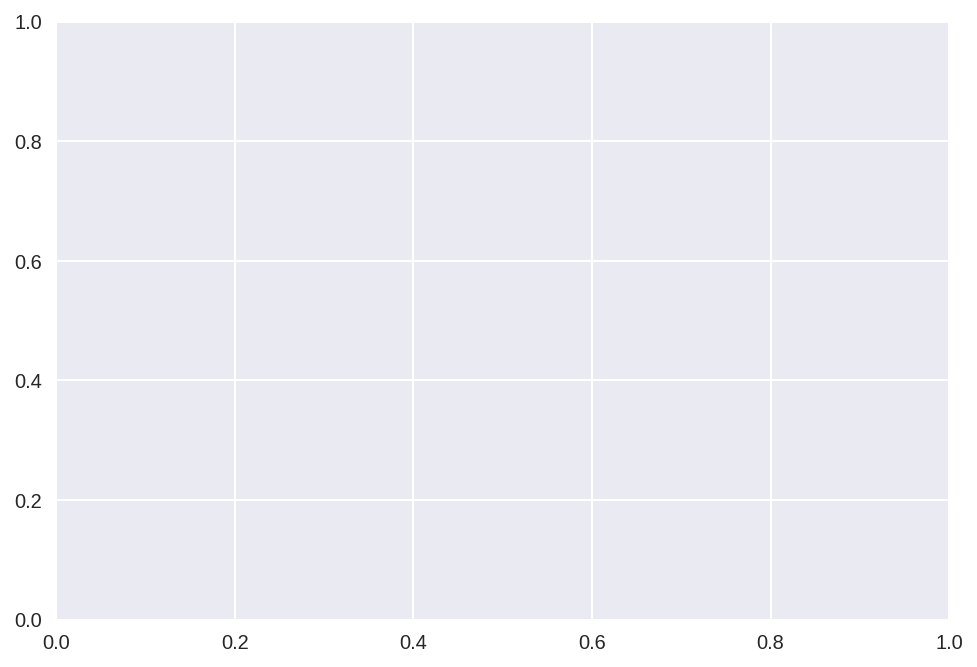

In [458]:
pd.plotting.parallel_coordinates(house1, 'ความมั่นใจในการเมินราคาทรัพย์')

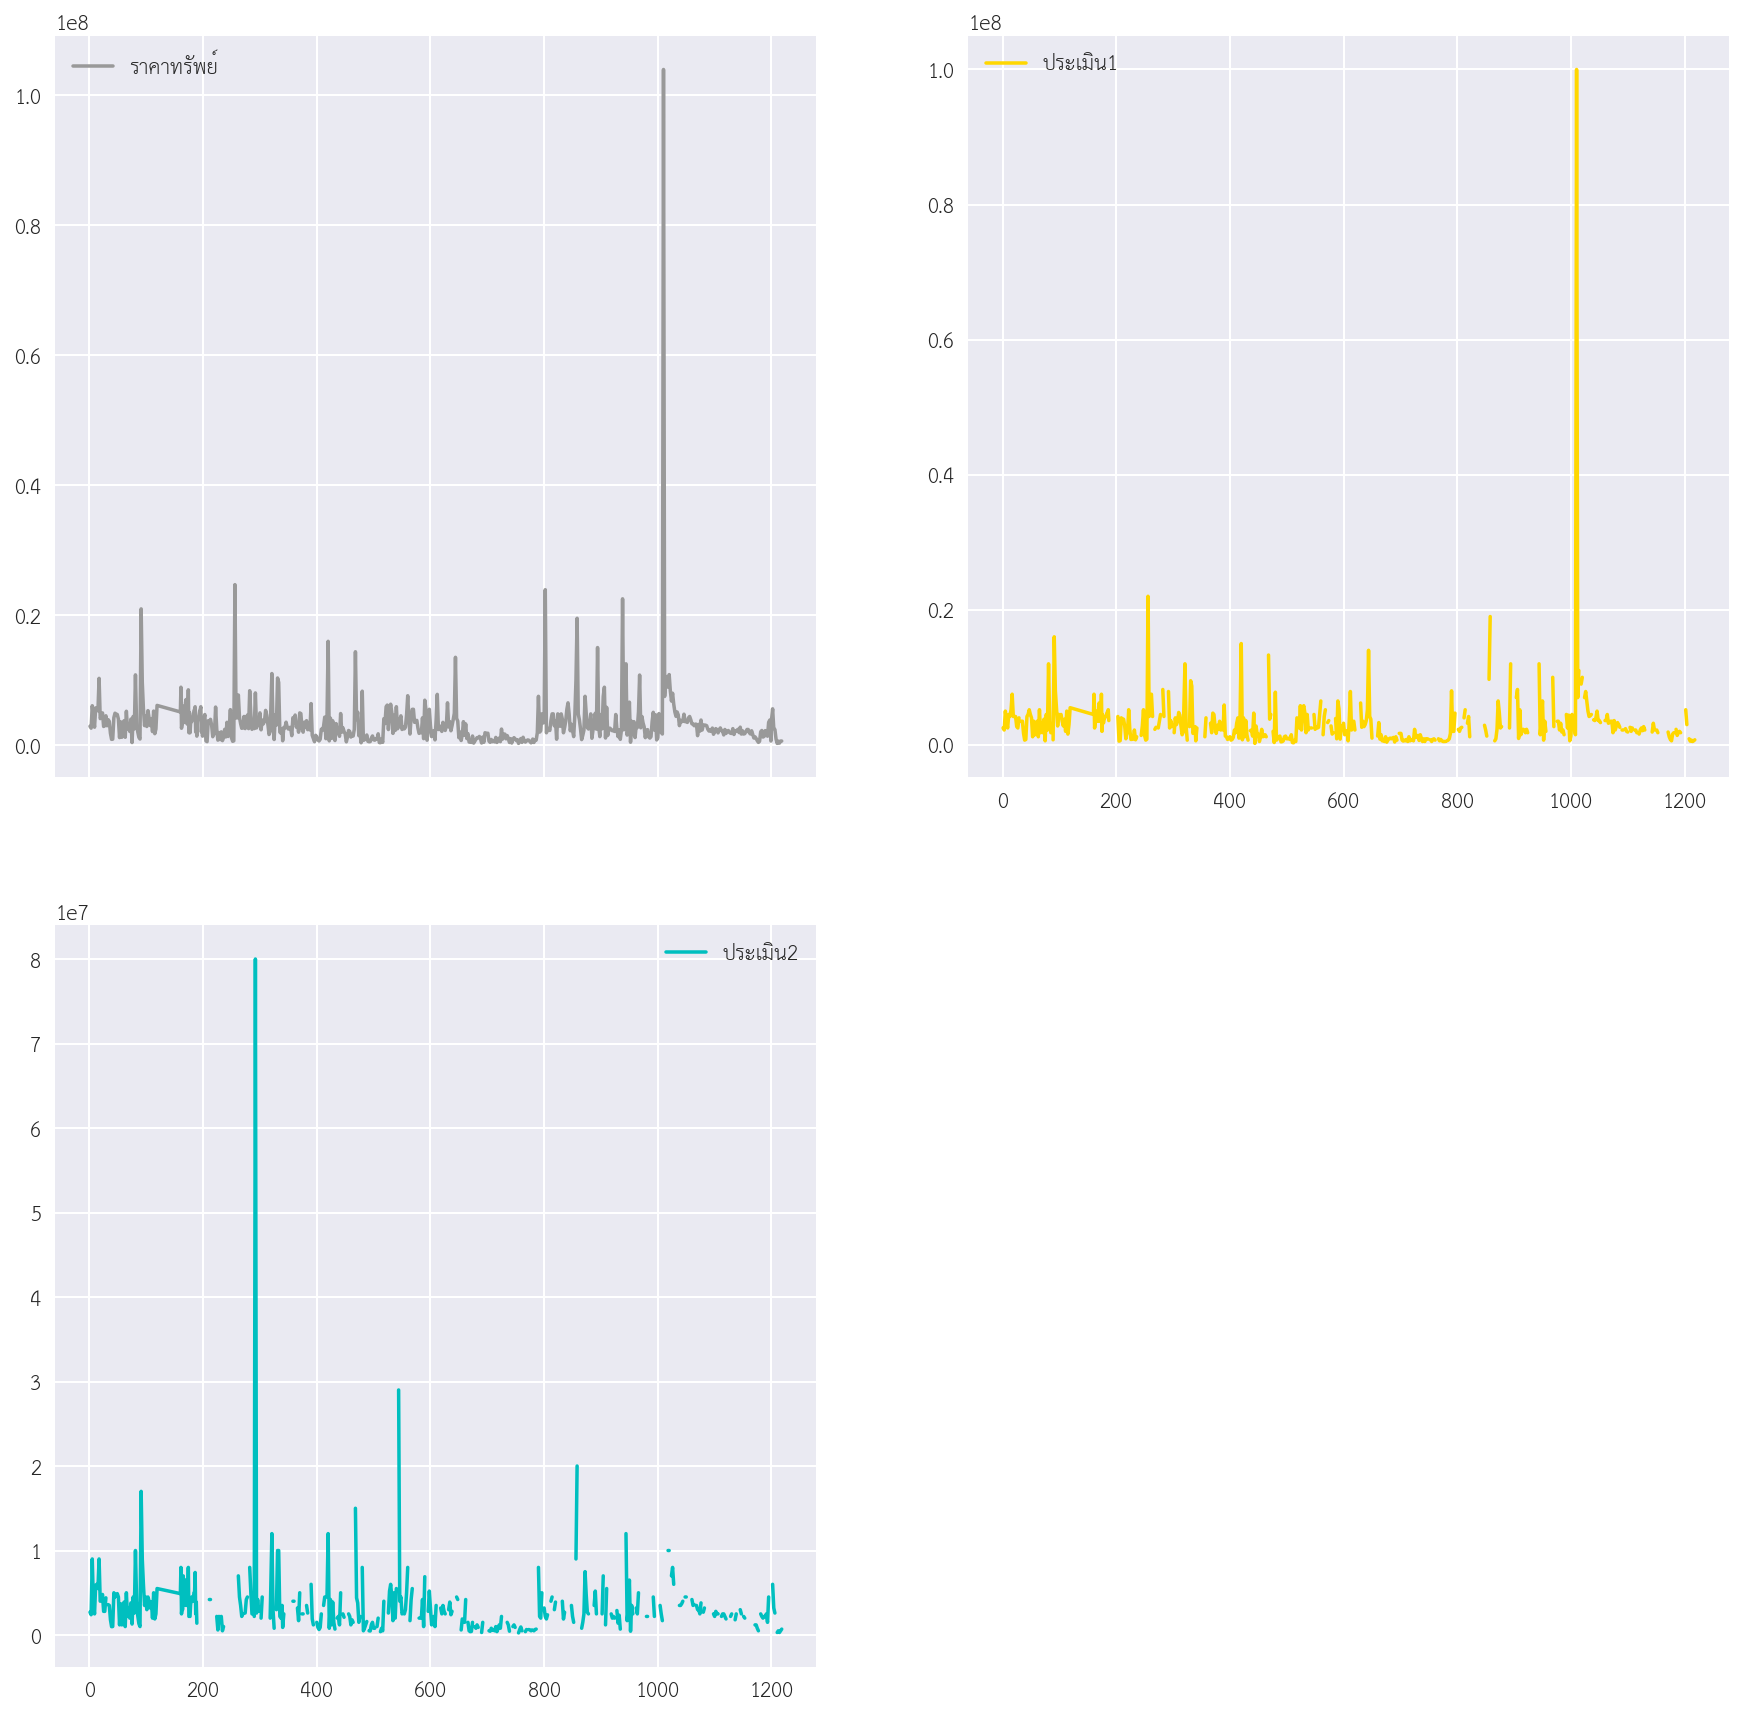

In [472]:
house1[['ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']].plot(kind='line', 
                                subplots=True, 
                                layout=(2, 2),
                                figsize=(15, 15),
                                color=['.6', 'gold', 'c']);

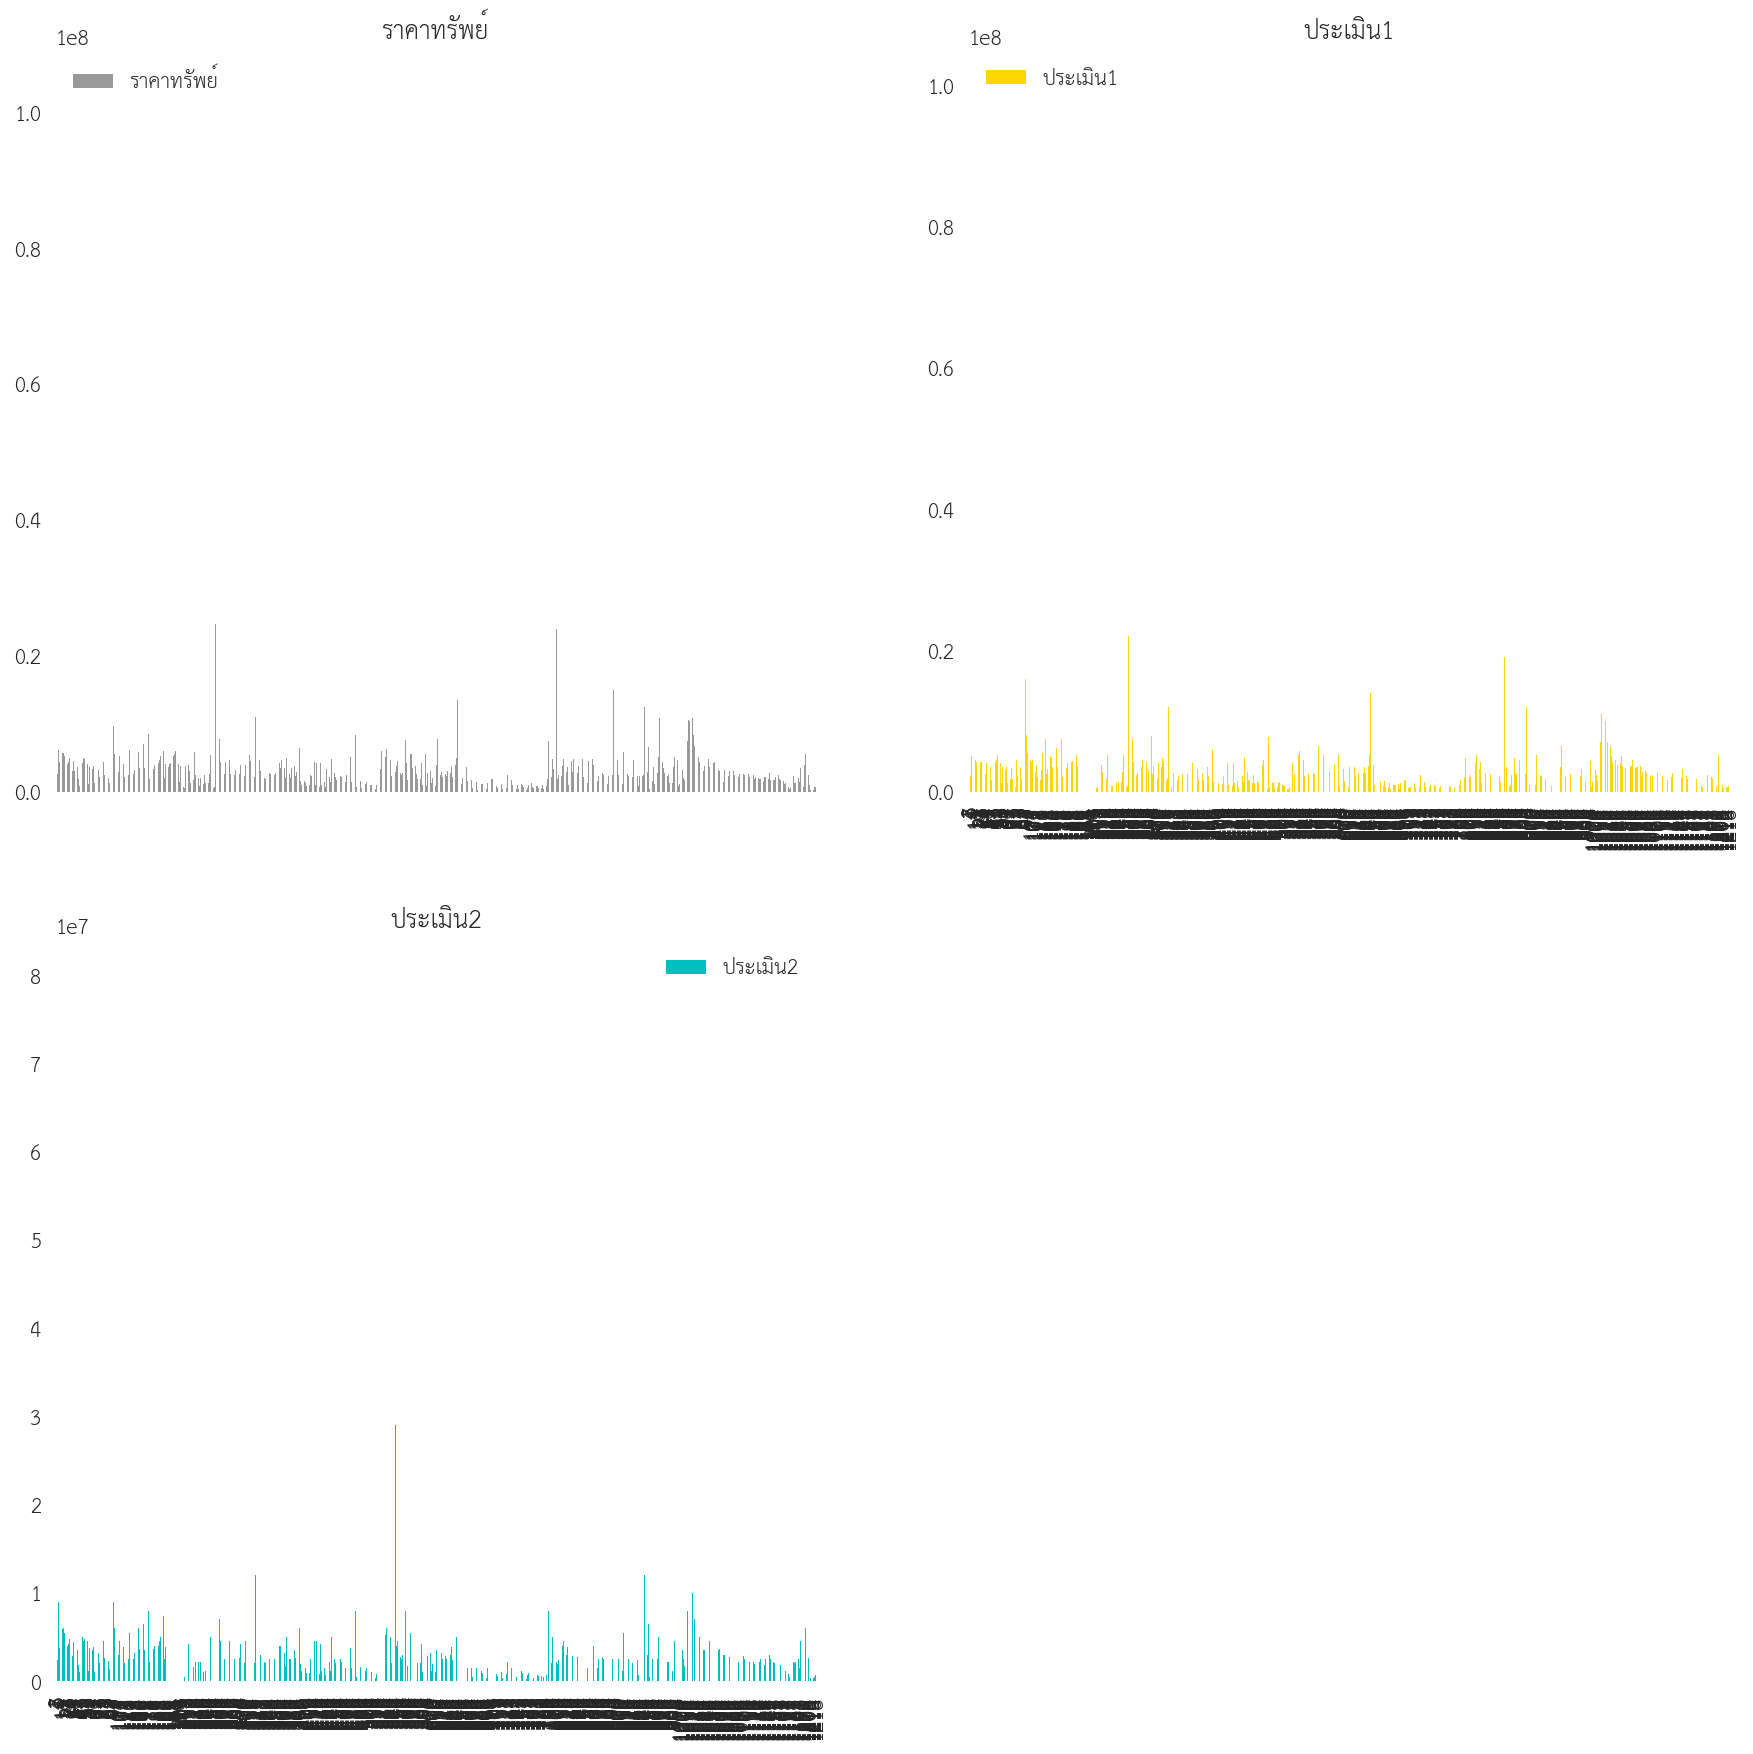

In [473]:
house1[['ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']].plot(kind='bar', 
                                subplots=True, 
                                layout=(2, 2),
                                figsize=(15, 15),
                                color=['.6', 'gold', 'c']);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b2fec3f70>,
      dtype=object)

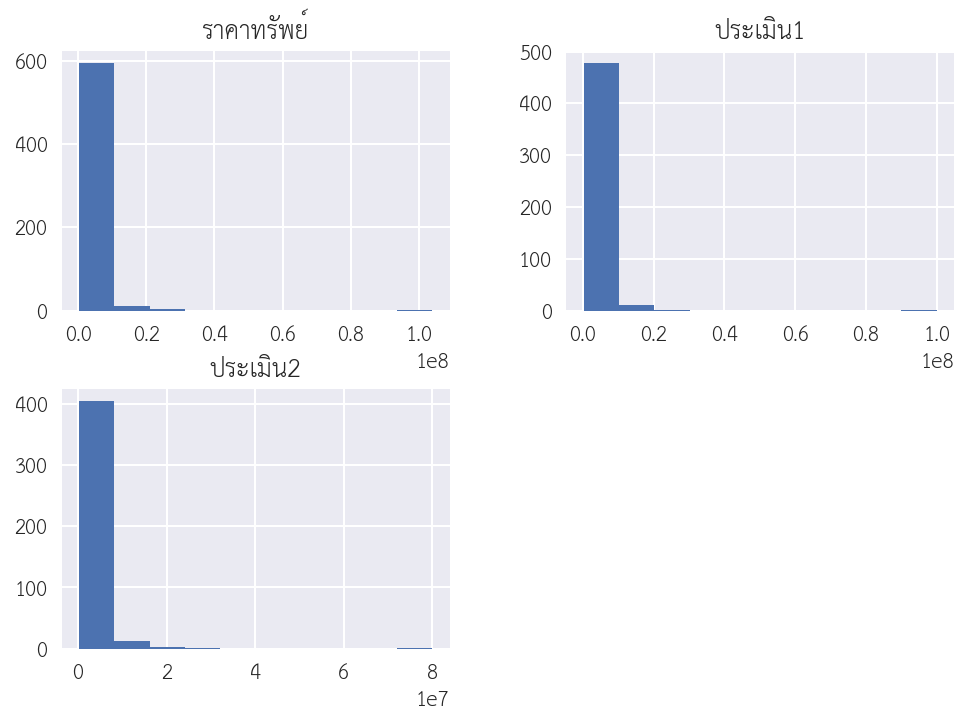

In [474]:
house1.hist()

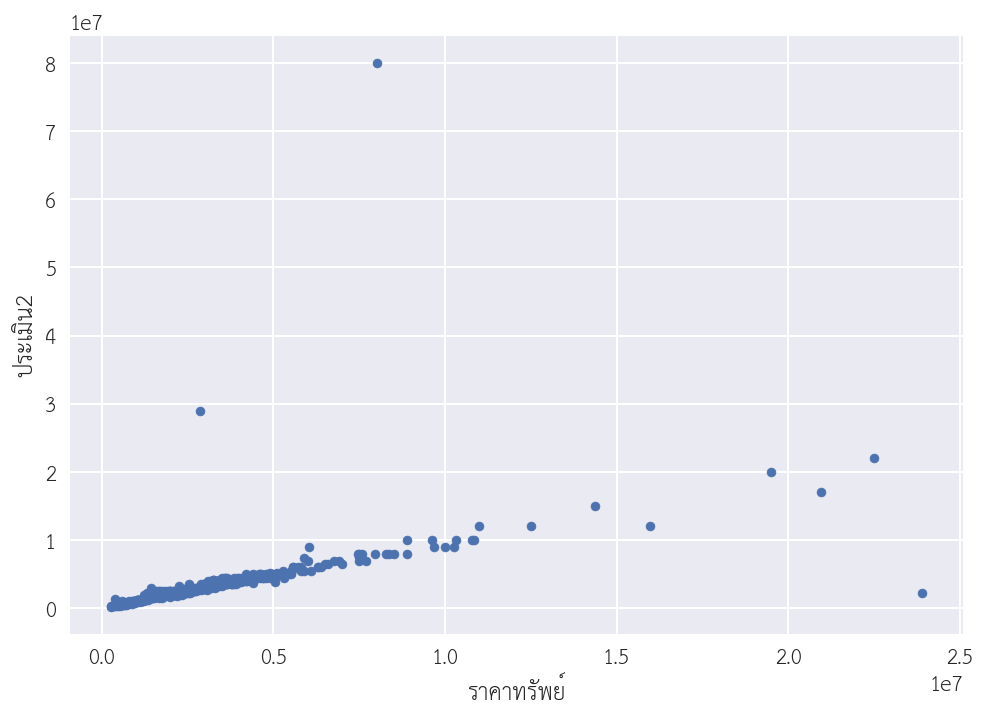

In [477]:
house1.plot.scatter(x='ราคาทรัพย์', y='ประเมิน2')

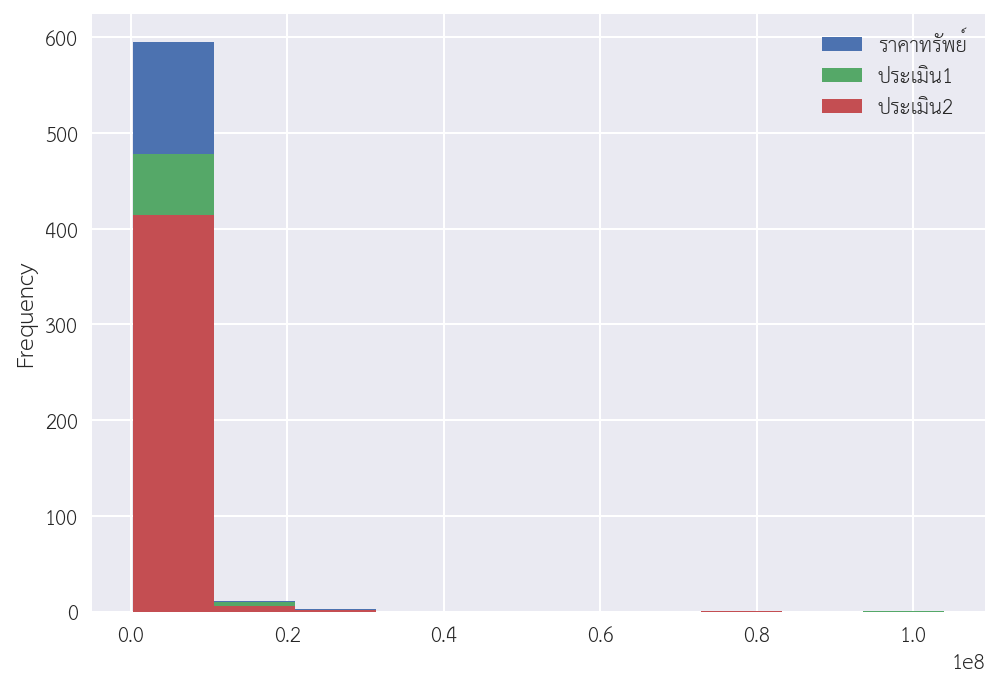

In [478]:
house1[['ราคาทรัพย์', 'ประเมิน1','ประเมิน2']].plot.hist()

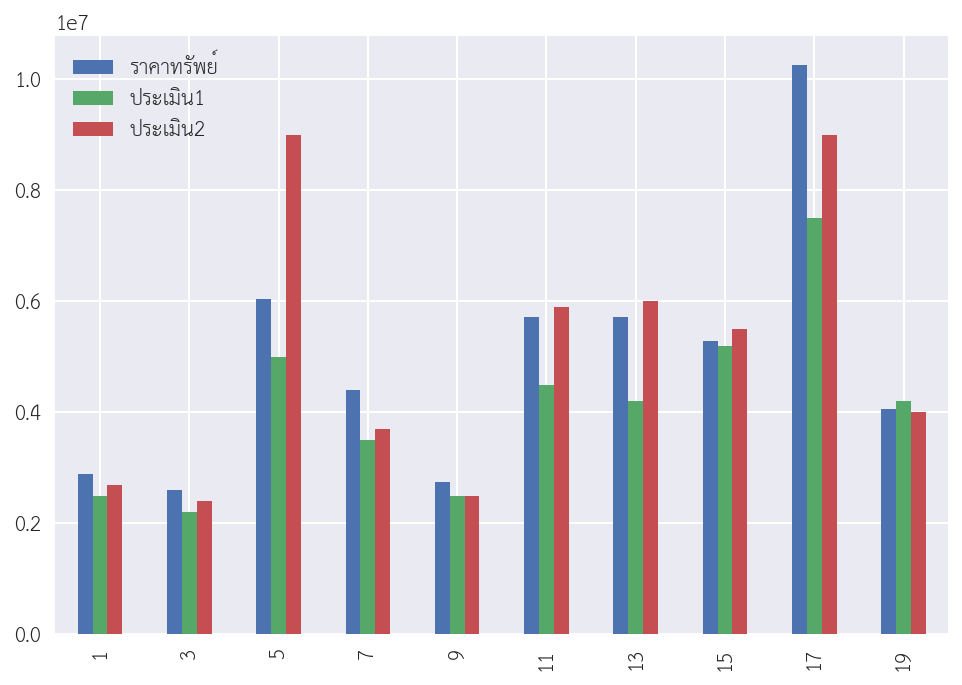

In [479]:
house1[:10].plot(kind='bar');

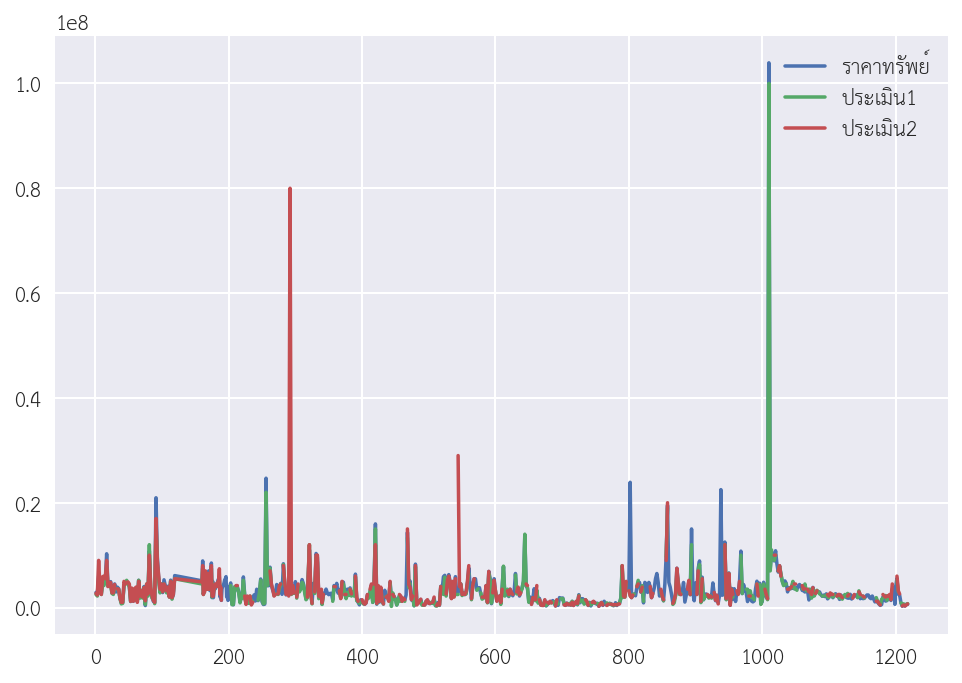

In [480]:
house1.plot(kind = 'line');

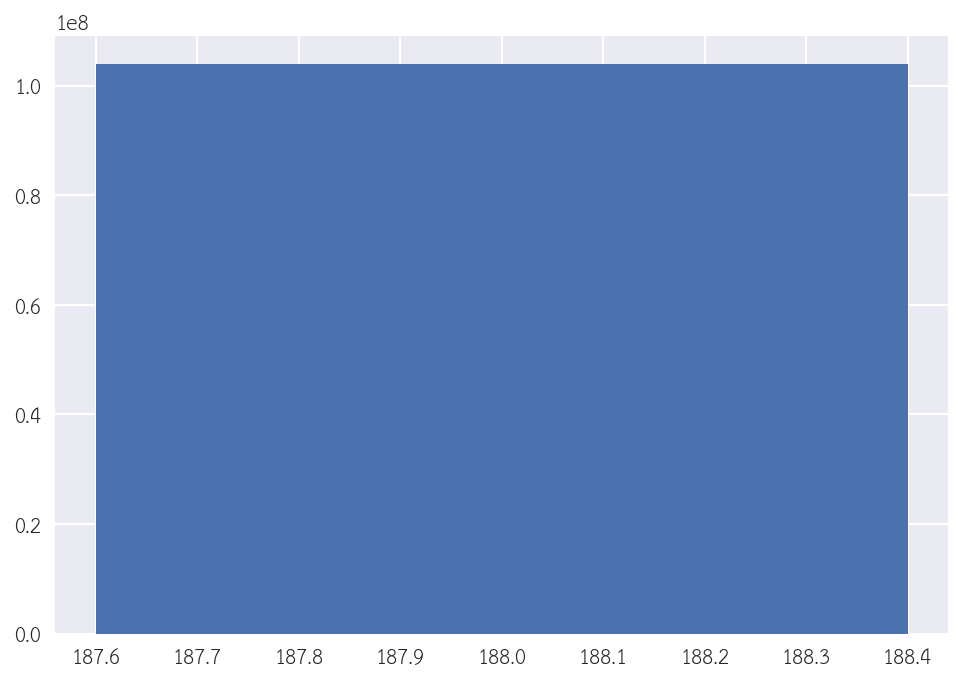

In [481]:
plt.bar([188],house1['ราคาทรัพย์']);

In [482]:
house1[house1['ความมั่นใจในการเมินราคาทรัพย์']=='มั่นใจ'].count()

post id                          499
ราคาทรัพย์                       499
ประเมิน1                         391
ประเมิน2                         423
ความมั่นใจในการเมินราคาทรัพย์    499
ให้คะแนนทรัพย์                   499
dtype: int64

In [484]:
house_pr = house1[house1['ความมั่นใจในการเมินราคาทรัพย์']=='ไม่มั่นใจ']
house_pr.count()

post id                          111
ราคาทรัพย์                       111
ประเมิน1                         100
ประเมิน2                           0
ความมั่นใจในการเมินราคาทรัพย์    111
ให้คะแนนทรัพย์                     0
dtype: int64

In [515]:
land1[land1['ความมั่นใจในการเมินราคาทรัพย์']=='มั่นใจ'].count()

post id                          100
ราคาทรัพย์                       100
ประเมิน1                          94
ประเมิน2                          95
ความมั่นใจในการเมินราคาทรัพย์    100
ให้คะแนนทรัพย์                   100
dtype: int64

In [516]:
land1[land1['ความมั่นใจในการเมินราคาทรัพย์']=='ไม่มั่นใจ'].count()

post id                          0
ราคาทรัพย์                       0
ประเมิน1                         0
ประเมิน2                         0
ความมั่นใจในการเมินราคาทรัพย์    0
ให้คะแนนทรัพย์                   0
dtype: int64

In [518]:
townhome1[townhome1['ความมั่นใจในการเมินราคาทรัพย์']=='มั่นใจ'].count()

post id                          120
ราคาทรัพย์                       120
ประเมิน1                          96
ประเมิน2                         101
ความมั่นใจในการเมินราคาทรัพย์    120
ให้คะแนนทรัพย์                   120
dtype: int64

In [519]:
townhome1[townhome1['ความมั่นใจในการเมินราคาทรัพย์']=='ไม่มั่นใจ'].count()

post id                          0
ราคาทรัพย์                       0
ประเมิน1                         0
ประเมิน2                         0
ความมั่นใจในการเมินราคาทรัพย์    0
ให้คะแนนทรัพย์                   0
dtype: int64

In [522]:
commercial1[commercial1['ความมั่นใจในการเมินราคาทรัพย์']=='มั่นใจ'].count()

post id                          91
ราคาทรัพย์                       91
ประเมิน1                         81
ประเมิน2                         83
ความมั่นใจในการเมินราคาทรัพย์    91
ให้คะแนนทรัพย์                   90
dtype: int64

In [523]:
commercial1[commercial1['ความมั่นใจในการเมินราคาทรัพย์']=='ไม่มั่นใจ'].count()

post id                          9
ราคาทรัพย์                       9
ประเมิน1                         9
ประเมิน2                         0
ความมั่นใจในการเมินราคาทรัพย์    9
ให้คะแนนทรัพย์                   0
dtype: int64

In [510]:
matplotlib.rcParams['figure.figsize']=[10,10]

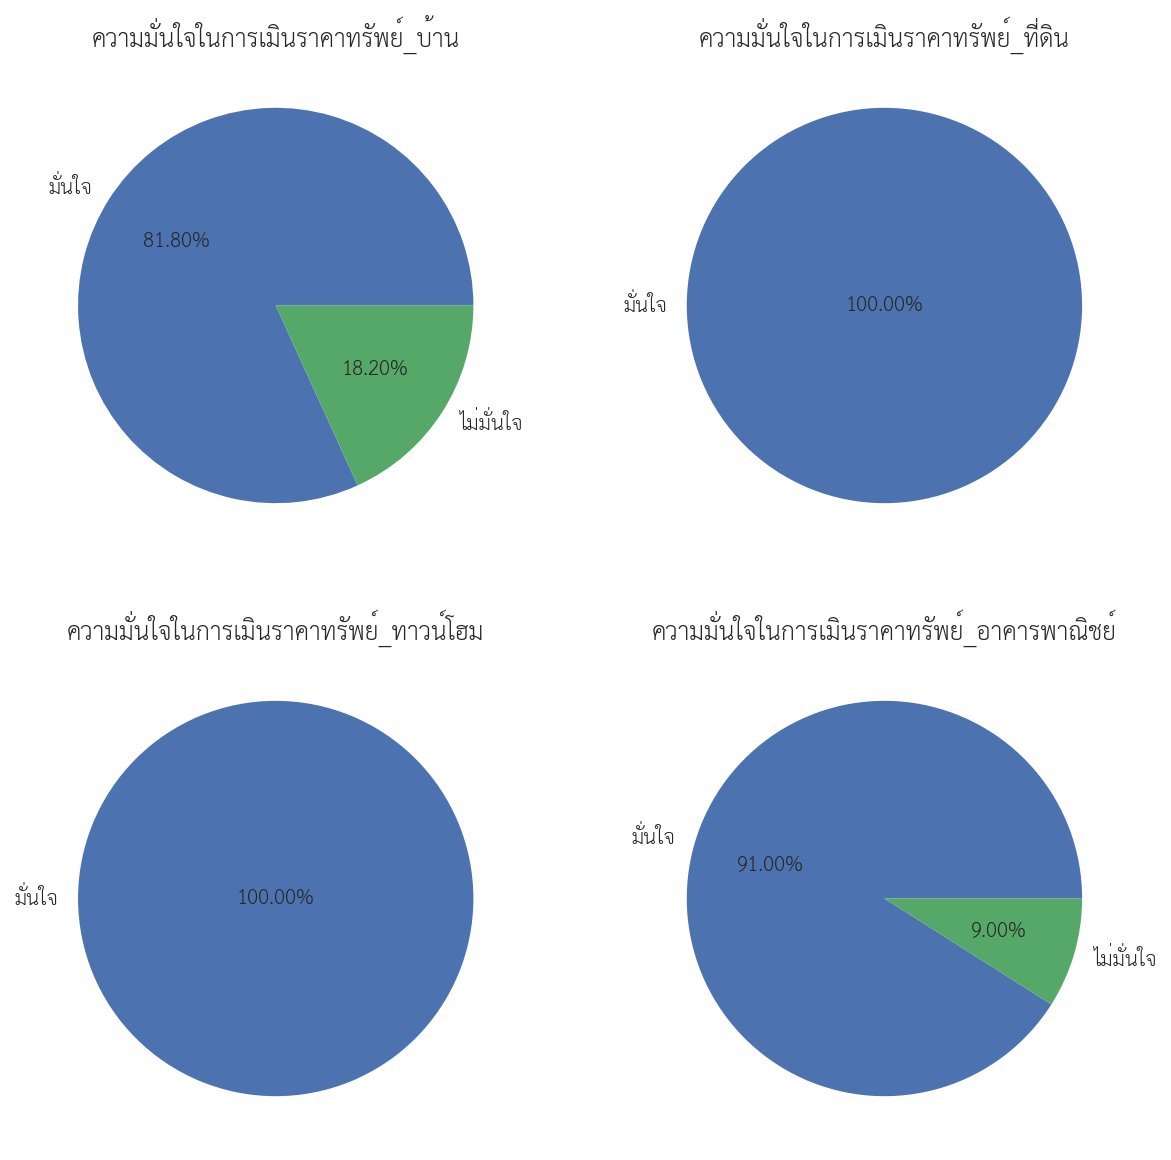

In [535]:
import matplotlib.pyplot as plt
colors = ['tab:blue', 'tab:red']


plt.subplot(2,2,1)
plt.title('ความมั่นใจในการเมินราคาทรัพย์_บ้าน')
house_type = ['มั่นใจ', 'ไม่มั่นใจ']
house_count = [499,111]

plt.pie(house_count, labels=house_type, autopct='%.2f%%', pctdistance=0.6)
#plt.show()

plt.subplot(2,2,2)
plt.title('ความมั่นใจในการเมินราคาทรัพย์_ที่ดิน')
land_type = ['มั่นใจ']
land_count = [100]

plt.pie(land_count, labels=land_type, autopct='%.2f%%', pctdistance=0)
#plt.show()

plt.subplot(2,2,3)
plt.title('ความมั่นใจในการเมินราคาทรัพย์_ทาวน์โฮม')
townhome_type = ['มั่นใจ']
townhome_count = [120]

plt.pie(townhome_count, labels=townhome_type, autopct='%.2f%%', pctdistance=0)
#plt.show()

plt.subplot(2,2,4)
plt.title('ความมั่นใจในการเมินราคาทรัพย์_อาคารพาณิชย์')
commercial_type = ['มั่นใจ', 'ไม่มั่นใจ']
commercial_count = [91,9]

plt.pie(commercial_count, labels=commercial_type, autopct='%.2f%%', pctdistance=0.6);
#plt.show()

In [593]:
house1 = est2[est2['ให้คะแนนทรัพย์']=='1 ขายไม่ได้แน่นอน']
house1.count()

ID ผู้ประเมิน                     0
post id                           0
property_type                     0
ความมั่นใจในการเมินราคาทรัพย์     0
ราคาทรัพย์                        0
ประเมินราคาซื้อ-ขาย               0
ปัจจัยในการประเมินราคาซื้อ-ขาย    0
เหตุผลไม่มั่นใจราคาประเมิน        0
ให้คะแนนทรัพย์                    0
ประเมิน1                          0
ประเมิน2                          0
dtype: int64

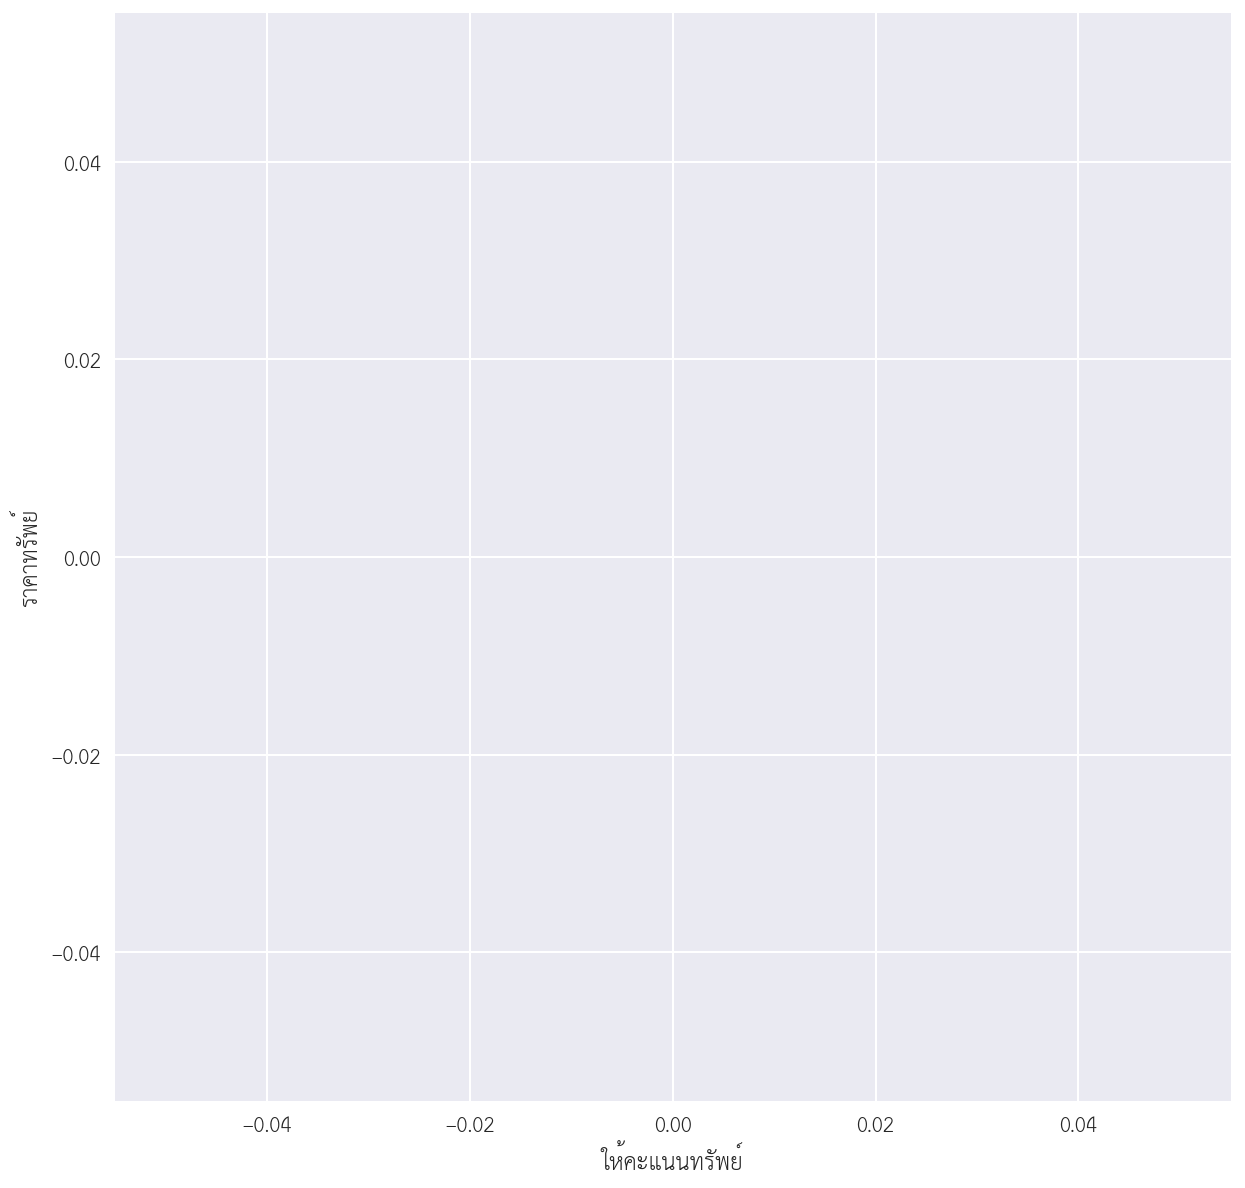

In [594]:
house1.plot.scatter(x='ให้คะแนนทรัพย์', y='ราคาทรัพย์')

In [595]:
house1 = est2[est2['ให้คะแนนทรัพย์']=='2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี']
house1.count()

ID ผู้ประเมิน                     14
post id                           14
property_type                     14
ความมั่นใจในการเมินราคาทรัพย์     14
ราคาทรัพย์                        14
ประเมินราคาซื้อ-ขาย               14
ปัจจัยในการประเมินราคาซื้อ-ขาย    14
เหตุผลไม่มั่นใจราคาประเมิน         0
ให้คะแนนทรัพย์                    14
ประเมิน1                          13
ประเมิน2                          14
dtype: int64

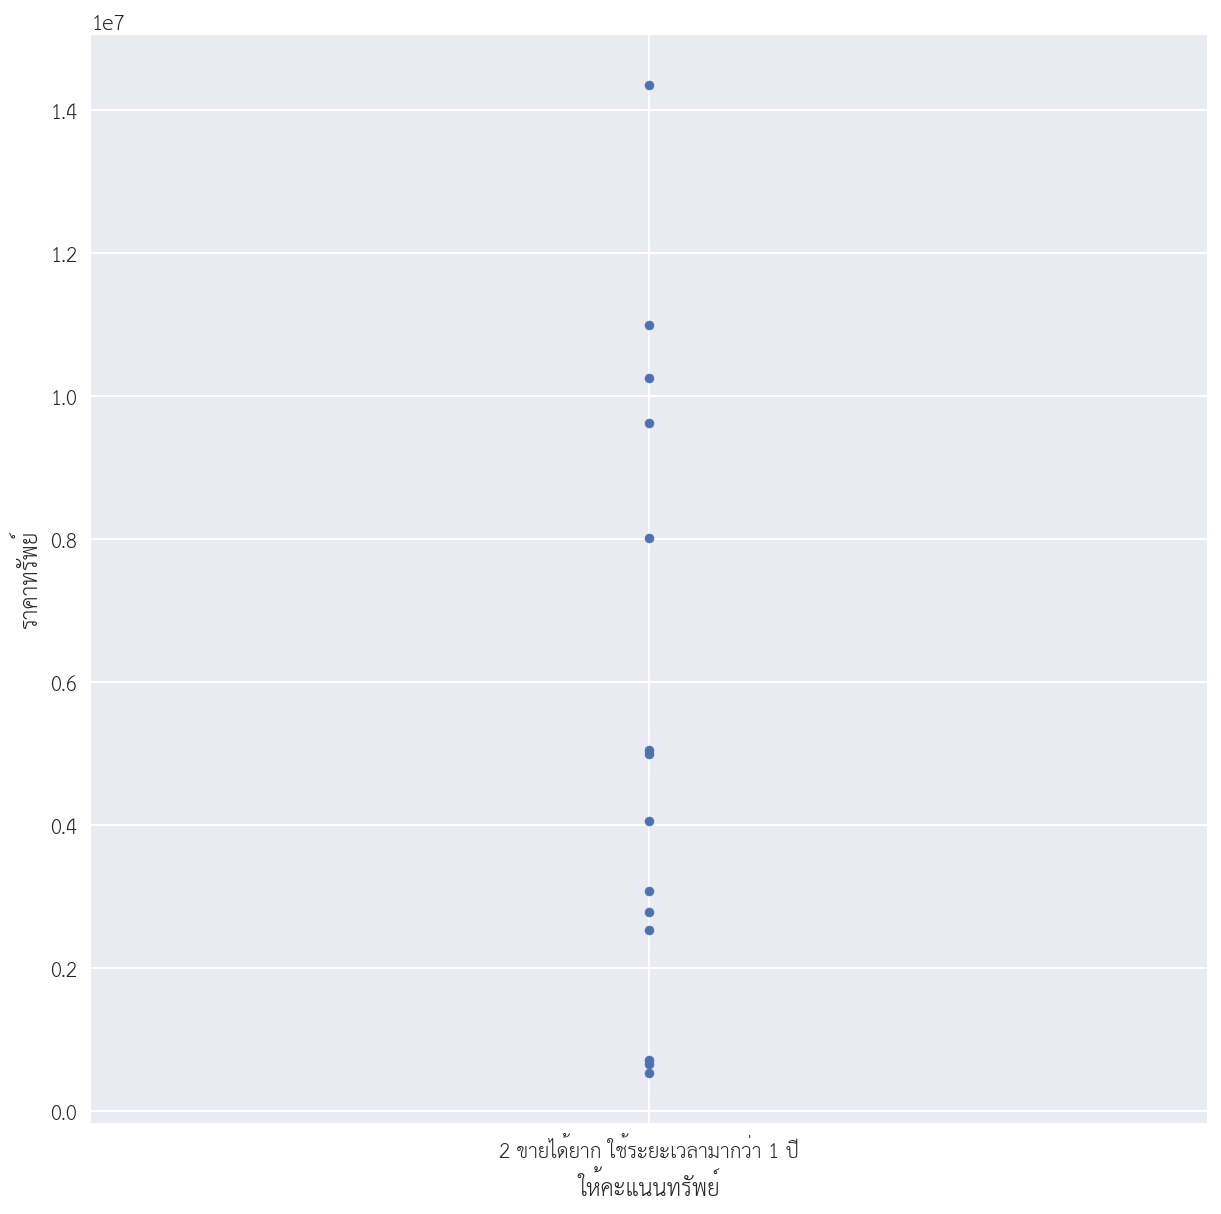

In [596]:
house1.plot.scatter(x='ให้คะแนนทรัพย์', y='ราคาทรัพย์')

In [597]:
house1 = est2[est2['ให้คะแนนทรัพย์']=='3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน']
house1.count()

ID ผู้ประเมิน                     367
post id                           367
property_type                     367
ความมั่นใจในการเมินราคาทรัพย์     367
ราคาทรัพย์                        367
ประเมินราคาซื้อ-ขาย               366
ปัจจัยในการประเมินราคาซื้อ-ขาย    367
เหตุผลไม่มั่นใจราคาประเมิน          1
ให้คะแนนทรัพย์                    367
ประเมิน1                          285
ประเมิน2                          308
dtype: int64

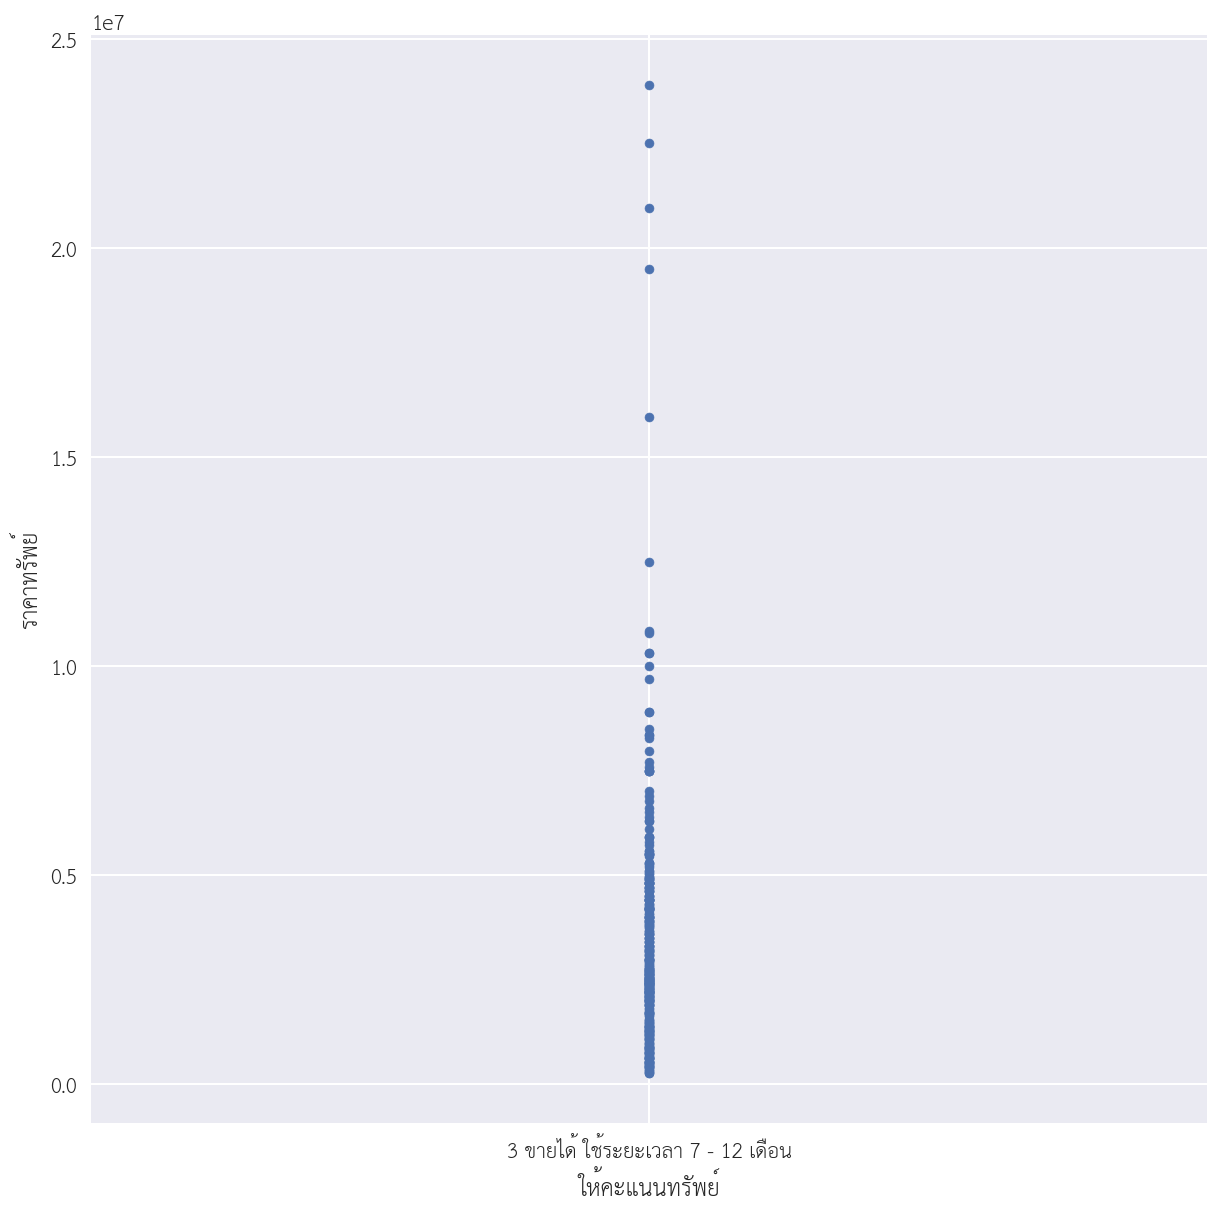

In [598]:
house1.plot.scatter(x='ให้คะแนนทรัพย์', y='ราคาทรัพย์')

In [599]:
house1 = est2[est2['ให้คะแนนทรัพย์']=='4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน']
house1.count()

ID ผู้ประเมิน                     117
post id                           117
property_type                     117
ความมั่นใจในการเมินราคาทรัพย์     117
ราคาทรัพย์                        117
ประเมินราคาซื้อ-ขาย               117
ปัจจัยในการประเมินราคาซื้อ-ขาย    117
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    117
ประเมิน1                           92
ประเมิน2                          100
dtype: int64

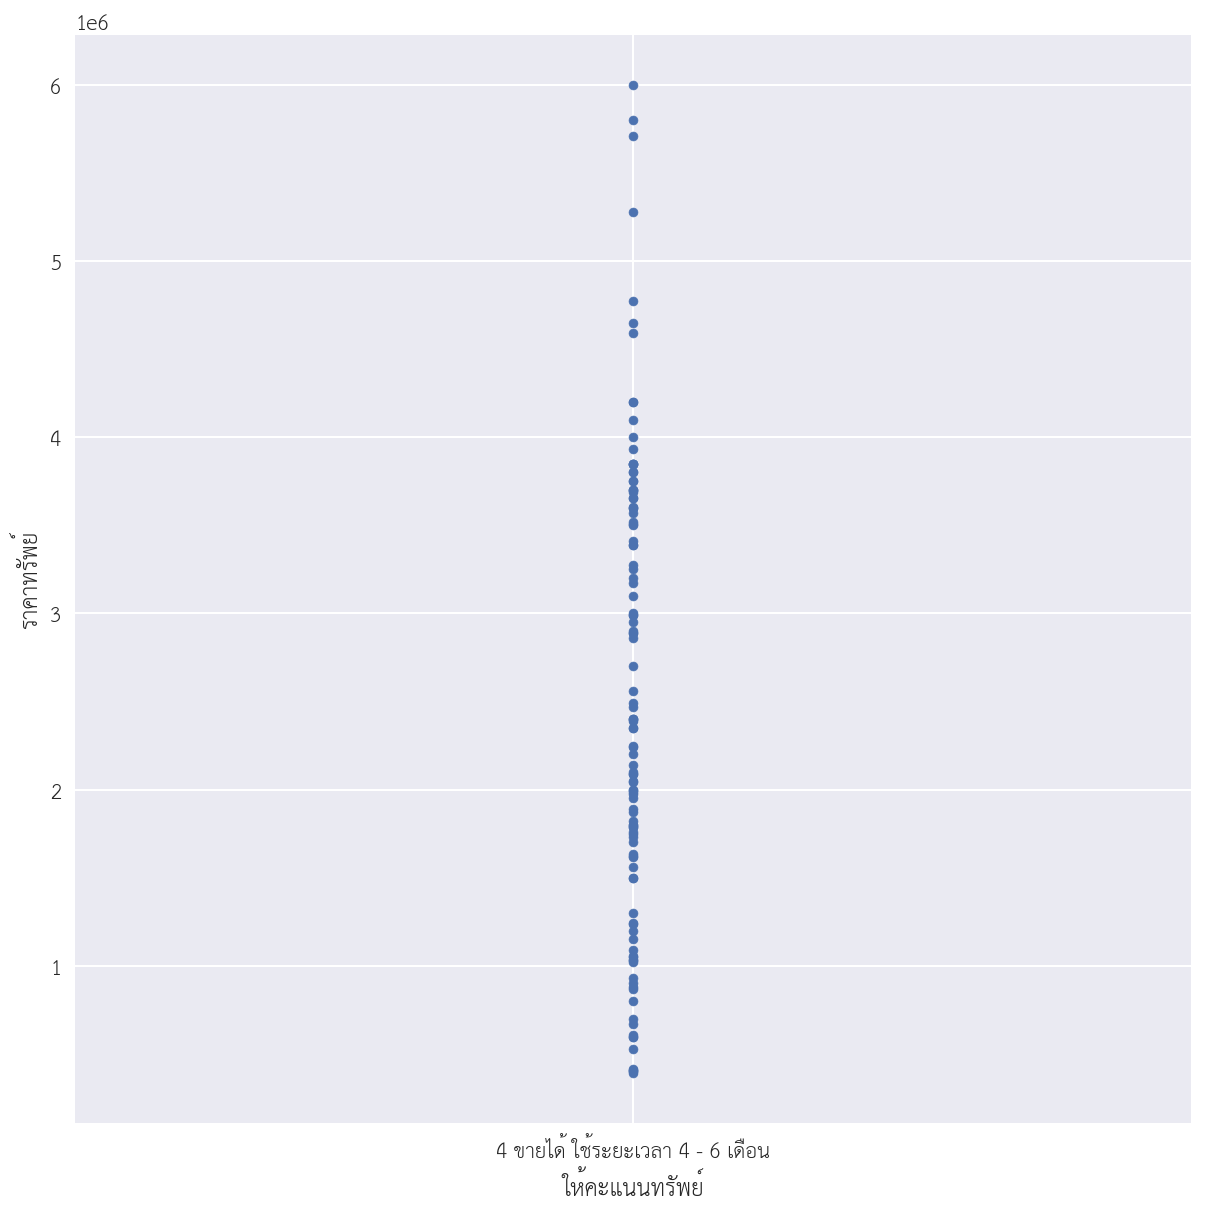

In [600]:
house1.plot.scatter(x='ให้คะแนนทรัพย์', y='ราคาทรัพย์')

In [601]:
house1 = est2[est2['ให้คะแนนทรัพย์']=='5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน']
house1.count()

ID ผู้ประเมิน                     1
post id                           1
property_type                     1
ความมั่นใจในการเมินราคาทรัพย์     1
ราคาทรัพย์                        1
ประเมินราคาซื้อ-ขาย               1
ปัจจัยในการประเมินราคาซื้อ-ขาย    1
เหตุผลไม่มั่นใจราคาประเมิน        0
ให้คะแนนทรัพย์                    1
ประเมิน1                          1
ประเมิน2                          1
dtype: int64

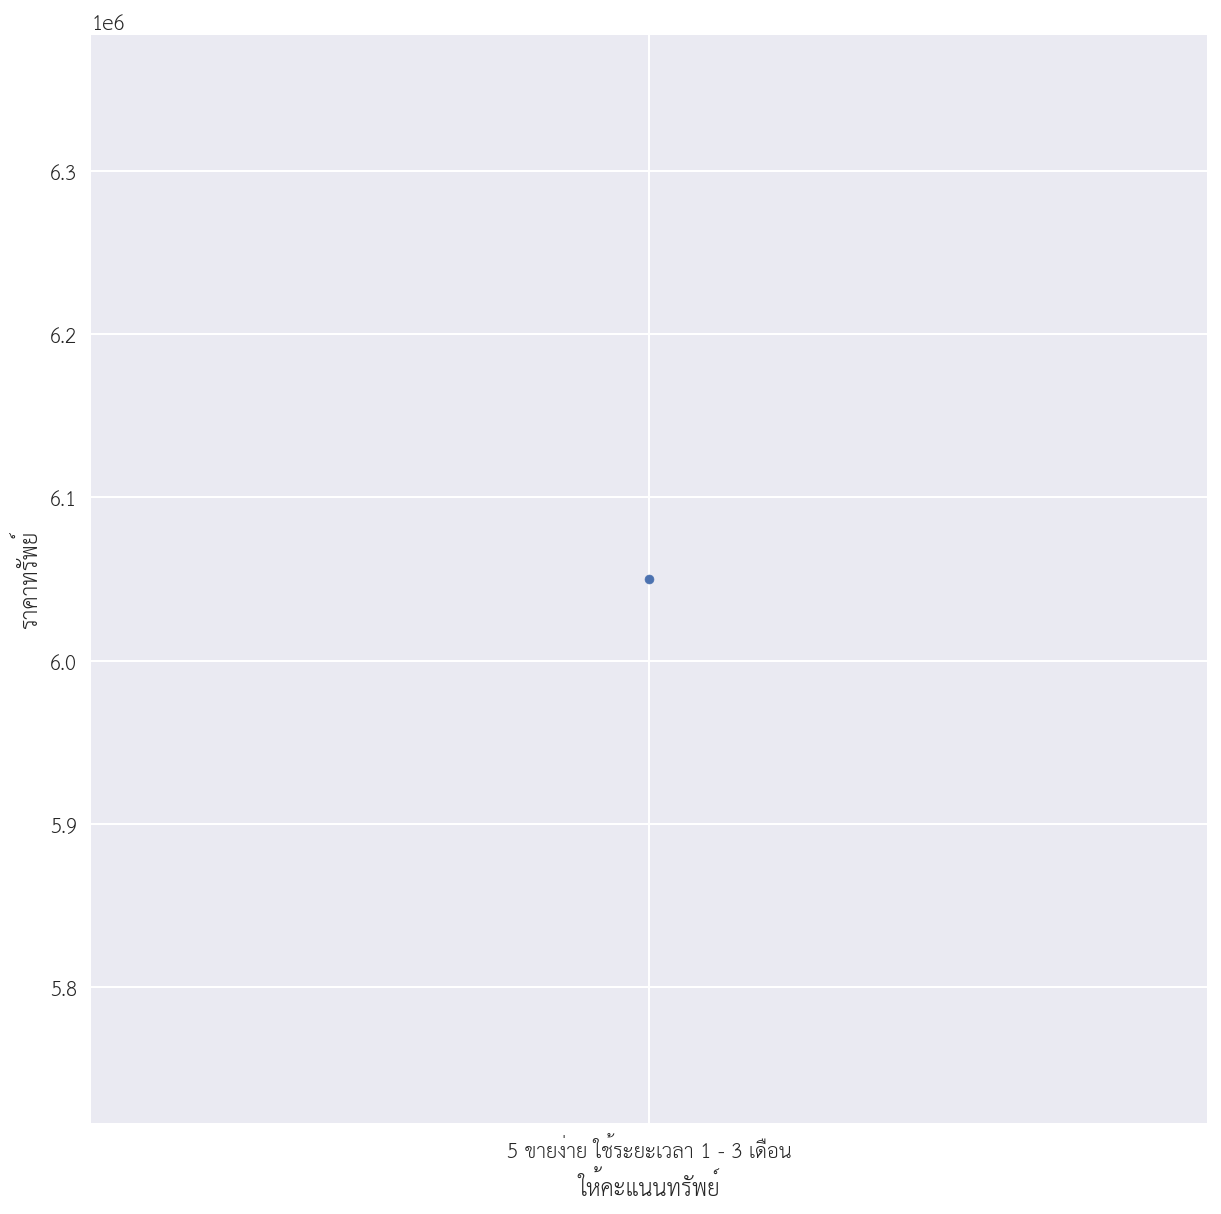

In [602]:
house1.plot.scatter(x='ให้คะแนนทรัพย์', y='ราคาทรัพย์')

In [592]:
house1= est2['ให้คะแนนทรัพย์']
house1

1        4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3       3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5       5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7       3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9       3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
                      ...                
1210    3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1212    3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1214    3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1216    3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1218    3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
Name: ให้คะแนนทรัพย์, Length: 610, dtype: object

In [585]:
house1 = est2[est2['ให้คะแนนทรัพย์']=='5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน']
house1.count()

ID ผู้ประเมิน                     1
post id                           1
property_type                     1
ความมั่นใจในการเมินราคาทรัพย์     1
ราคาทรัพย์                        1
ประเมินราคาซื้อ-ขาย               1
ปัจจัยในการประเมินราคาซื้อ-ขาย    1
เหตุผลไม่มั่นใจราคาประเมิน        0
ให้คะแนนทรัพย์                    1
ประเมิน1                          1
ประเมิน2                          1
dtype: int64

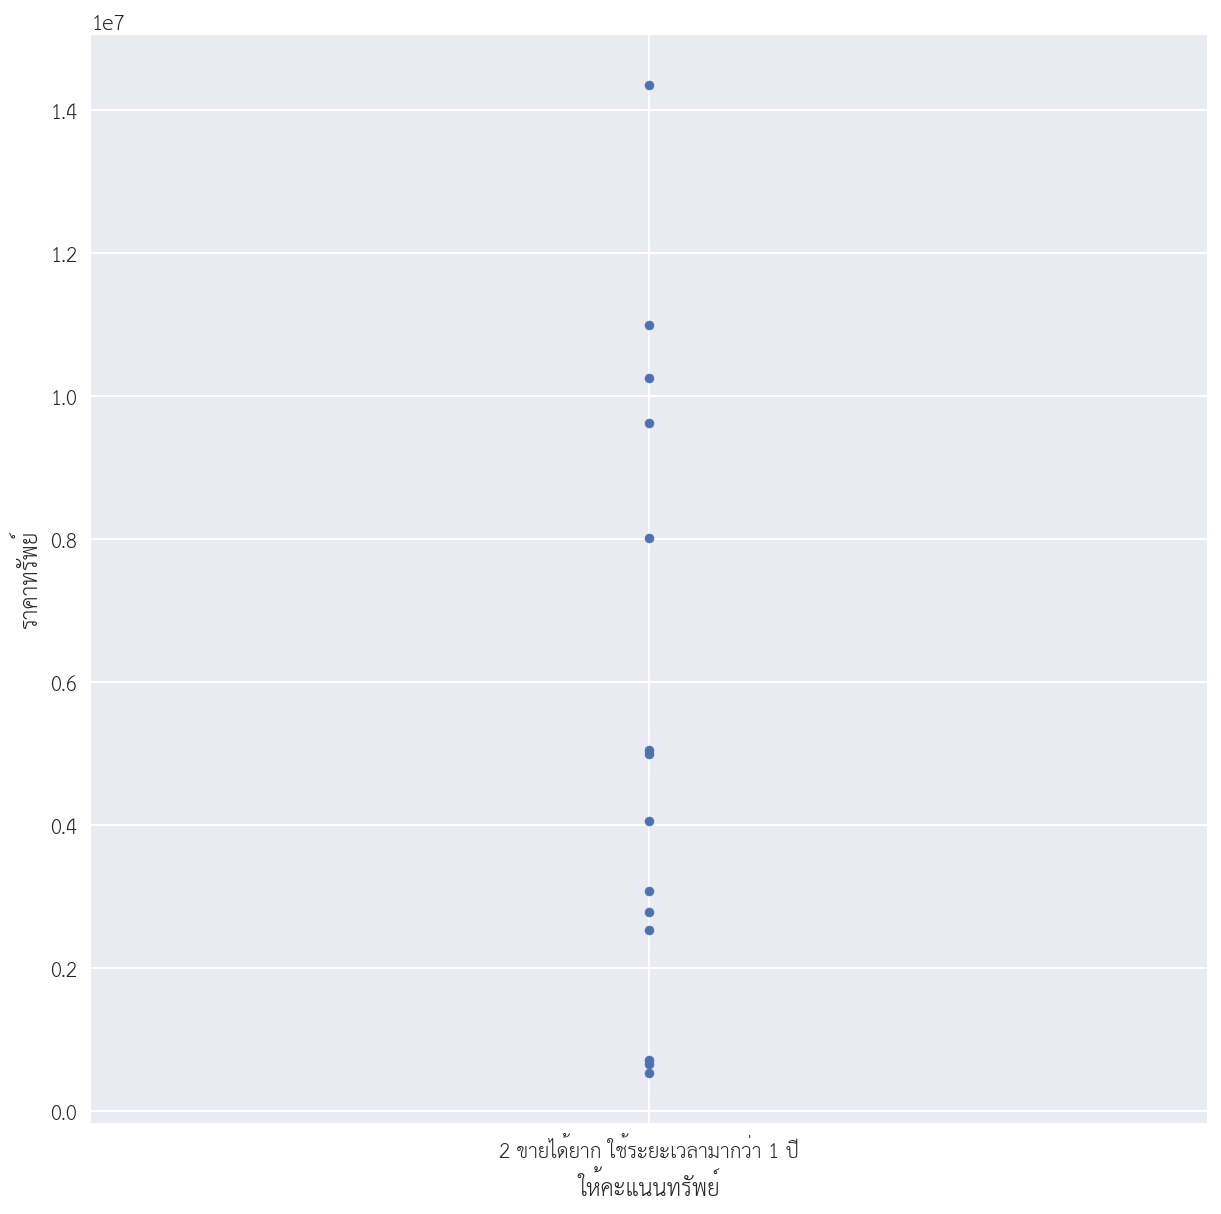

In [590]:
house1.plot.scatter(x='ให้คะแนนทรัพย์', y='ราคาทรัพย์')